In [1]:
# !apt-get install -y fonts-nanum
# !rm ~/.cache/matplotlib -rf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import matplotlib.font_manager as fm
import matplotlib as mpl

# ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Î™©Î°ùÏùÑ Í∞±Ïã†ÌïòÍ≥†, 'NanumGothic' Ìè∞Ìä∏Î•º Í∏∞Î≥∏ Ìè∞Ìä∏Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# ÌïúÍ∏ÄÏù¥ Íπ®ÏßÄÏßÄ ÏïäÎèÑÎ°ù ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú minus ÌëúÏãúÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
plt.rcParams['axes.unicode_minus'] = False

processed_seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_seoul.csv')
processed_gyeonggi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_gyeonggi.csv')
processed_incheon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_incheon.csv')
processed_busan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_busan.csv')
processed_daegu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_daegu.csv')
processed_gwangju = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_gwangju.csv')
processed_daejeon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_daejeon.csv')
processed_ulsan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_ulsan.csv')

# ÎèÑÏãúÎ≥Ñ df ÎîïÏÖîÎÑàÎ¶¨
city_dfs = {
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': processed_seoul,
    'Í≤ΩÍ∏∞ÎèÑ': processed_gyeonggi,
    'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': processed_incheon,
    'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': processed_busan,
    'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': processed_daegu,
    'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': processed_gwangju,
    'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': processed_daejeon,
    'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': processed_ulsan
}

In [3]:
"""
Îç∞Ïù¥ÌÑ∞ÏÖã ÏπºÎüº ÏÑ§Î™Ö

0   'Í∂åÏó≠': ÌñâÏ†ï Íµ¨Ïó≠ Í∏∞Ï§Ä Í∂åÏó≠ Ï†ïÎ≥¥ (ÏàòÎèÑÍ∂å/ÏßÄÎ∞©)
1   'ÏãúÍµ∞Íµ¨': Ïãú/Íµ∞/Íµ¨ Îã®ÏúÑ ÌñâÏ†ï Íµ¨Ïó≠Î™Ö
2   'Î≤àÏßÄ': ÎèÑÎ°úÎ™Ö Ï£ºÏÜåÏùò Î≤àÏßÄ Ï†ïÎ≥¥
3   'Î≥∏Î≤à': ÎèÑÎ°úÎ™Ö Ï£ºÏÜåÏùò Î≥∏Î≤à
4   'Î∂ÄÎ≤à': ÎèÑÎ°úÎ™Ö Ï£ºÏÜåÏùò Î∂ÄÎ≤à
5   'Îã®ÏßÄÎ™Ö': ÏïÑÌååÌä∏ Îã®ÏßÄ Ïù¥Î¶Ñ
6   'Í≥ÑÏïΩÎÖÑÏõî': Í≥ÑÏïΩ Î∞úÏÉù Ïó∞Ïõî (YYYYMM)
7   'Í≥ÑÏïΩÎÖÑÎèÑ': Í≥ÑÏïΩ Î∞úÏÉù Ïó∞ÎèÑ (YYYY)
8   'Í≥ÑÏïΩÏõî': Í≥ÑÏïΩ Î∞úÏÉù Ïõî (1~12)
9   'Í≥ÑÏïΩÏùº': Í≥ÑÏïΩ Î∞úÏÉù Ïùº (1~31)
10  'contract_season': Í≥ÑÏïΩ Î∞úÏÉù Í≥ÑÏ†à (Î¥Ñ/Ïó¨Î¶Ñ/Í∞ÄÏùÑ/Í≤®Ïö∏)
11  'area_bin': Ï†ÑÏö©Î©¥Ï†Å Í∏∞Ï§Ä Î©¥Ï†Å Íµ¨Í∞Ñ
    - Î∂ÑÎ•ò Í∏∞Ï§Ä:
        - ‚â§60 „é° : ÏÜåÌòï
        - 61~85 „é° : Ï§ëÏÜåÌòï
        - 86~135 „é° : Ï§ëÎåÄÌòï
        - >135 „é° : ÎåÄÌòï
12  'Ï†ÑÏö©Î©¥Ï†Å(„é°)': ÏïÑÌååÌä∏Ïùò Ï†ÑÏö©Î©¥Ï†Å („é°)
13  'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)': Ïã§Ï†ú Í±∞Îûò Í∏àÏï° (ÎßåÏõê)
14  'price_per_m2': ÌèâÎãπ Í∞ÄÍ≤© (ÎßåÏõê/„é°)
15  'Ï∏µ': Í±∞ÎûòÎêú Ï£ºÌÉùÏùò Ï∏µÏàò
16  'Í±¥Ï∂ïÎÖÑÎèÑ': Í±¥Î¨º Ï§ÄÍ≥µ Ïó∞ÎèÑ
17  'building_age': Í±¥Î¨º Ïó∞Ïãù (Í≥ÑÏïΩÎÖÑÎèÑ - Í±¥Ï∂ïÎÖÑÎèÑ)
18  'is_new_building': Ïã†Ï∂ï Ïó¨Î∂Ä (True: 5ÎÖÑ Ïù¥Ìïò Ïã†Ï∂ï)
19  'log_Í±∞ÎûòÍ∏àÏï°': Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)Ïùò Î°úÍ∑∏ Î≥ÄÌôò Í∞í
20  'log_price_per_m2': price_per_m2Ïùò Î°úÍ∑∏ Î≥ÄÌôò Í∞í
"""

processed_seoul.head()

Í∂åÏó≠            ÏãúÍµ∞Íµ¨       Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à          Îã®ÏßÄÎ™Ö    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÎÖÑÎèÑ  Í≥ÑÏïΩÏõî  Í≥ÑÏïΩÏùº  \
0  ÏàòÎèÑÍ∂å  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  1164-12  1164  12  ÏÉàÎ°¨(1164-12)  201205  2012    5   17   
1  ÏàòÎèÑÍ∂å  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  1164-12  1164  12  ÏÉàÎ°¨(1164-12)  201507  2015    7   28   
2  ÏàòÎèÑÍ∂å  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  1164-12  1164  12  ÏÉàÎ°¨(1164-12)  201709  2017    9   23   
3  ÏàòÎèÑÍ∂å  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  1164-12  1164  12  ÏÉàÎ°¨(1164-12)  201707  2017    7   21   
4  ÏàòÎèÑÍ∂å  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  1164-13  1164  13  ÏÉàÎ°¨(1164-13)  201001  2010    1    5   

   ... area_bin Ï†ÑÏö©Î©¥Ï†Å(„é°)  Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)  price_per_m2  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  building_age  \
0  ...      Ï§ëÏÜåÌòï   73.50   38000.0         517.0  6  2000            12   
1  ...      Ï§ëÏÜåÌòï   73.50   42000.0         571.4  3  2000            15   
2  ...      Ï§ëÏÜåÌòï   71.72   64500.0         899.3  7  2000            17   
3  ...      Ï§ëÏÜåÌòï   73.50   55400.0         753.7  2  2000            17   
4  ...       ÏÜåÌòï   59.67   35000.0         586.6  3  2000            10   

   is_new_building   log_Í±∞ÎûòÍ∏àÏï°  log_price_per_m2  
0            False  10.545341          6.248043  
1            False  10.645425          6.348089  
2            False  11.074421          6.801617  
3            False  10.922335          6.624994  
4            False  10.463103          6.374343  

[5 rows x 21 columns]

### **H3. Ïã†Ï∂ï Ïó¨Î∂Ä(is_new_building)Îäî ÌèâÎãπÍ∞Ä(log_price_per_m2)Ïóê ÏßÄÏó≠Î≥ÑÎ°ú Ï§ë~ÌÅ∞ Ï∞®Î≥Ñ Ìö®Í≥ºÎ•º Í∞ÄÏßÑÎã§.**  
### **H4. ÏàòÎèÑÍ∂åÎ≥¥Îã§Îäî ÏßÄÎ∞©ÏóêÏÑú Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í∞ÄÍ≤© ÏòÅÌñ•Î†•Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÅ¨Îã§.**
<br>

#### **Í≤ÄÏ¶ù Î∞©Î≤ï Î∞è Î∂ÑÏÑù Ï†àÏ∞®**

**1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ & ÌëúÎ≥∏ Ï∂îÏ∂ú (Stratified Sampling)**

- **Í±∞ÎûòÎüâ ÏßëÍ≥Ñ**
    - 2Ï∞® ÏßëÍ≥Ñ: ÎèÑÏãúÎ≥Ñ dfÏóêÏÑú¬†**`groupby(['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ']).size()`**‚Üí Ìï¥Îãπ ÏãúÍµ∞Íµ¨¬∑Í≥ÑÏïΩÎÖÑÎèÑ Îã®ÏúÑÏùò Ï¥ù Í±∞ÎûòÎüâÏùÑ ÏßëÍ≥Ñ (ÏãúÏû• Ïú†ÎèôÏÑ±Ïùò ÌÅ¨Í∏∞ Î∞òÏòÅÏö©)
    - 3Ï∞® ÏßëÍ≥Ñ: ÎèÑÏãúÎ≥Ñ dfÏóêÏÑú¬†**`groupby(['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ', 'is_new_building']).size()`**‚Üí Ïã†Ï∂ï Ïó¨Î∂ÄÍπåÏßÄ Íµ¨Î∂ÑÌïú ÏÑ∏Î∂Ä Í∑∏Î£πÏùò Í±∞ÎûòÎüâÏùÑ ÏßëÍ≥Ñ (Ìù¨ÏÜå ÏÖÄ ÌïÑÌÑ∞ÎßÅÏö©)
- **ÏµúÏÜå ÌëúÎ≥∏ ÌïÑÌÑ∞ÎßÅ (3Ï∞® ÏßëÍ≥Ñ Í∏∞Ï§Ä)**
    - ÏÑ∏Î∂Ä Í∑∏Î£π(ÏãúÍµ∞Íµ¨√óÍ≥ÑÏïΩÎÖÑÎèÑ√óÏã†Ï∂ï Ïó¨Î∂Ä) Í±∞ÎûòÎüâÏù¥ ÏûÑÍ≥ÑÍ∞í(**`MIN_CELL`**) ÎØ∏ÎßåÏùº Í≤ΩÏö∞ Ï†úÏô∏
    - Ïù¥Ïú†: ÏßÄÎÇòÏπòÍ≤å Ìù¨ÏÜåÌïú Í∑∏Î£πÏùÄ ÌÜµÍ≥ÑÏ†Å Ïã†Î¢∞ÎèÑÍ∞Ä ÎÇÆÍ≥†, ÌëúÎ≥∏Ïóê Ìè¨Ìï®Îê† Í≤ΩÏö∞ Î∂ÑÏÑù ÏôúÍ≥° Î∞úÏÉù Í∞ÄÎä•
- **Í∞ÄÏ§ëÏπò ÏÇ∞Ï∂ú (2Ï∞® ÏßëÍ≥Ñ Í∏∞Ï§Ä)**
    - ÌïÑÌÑ∞ÎßÅ ÌõÑ ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú, Í∞Å ÌñâÏù¥ ÏÜçÌïú¬†**`ÏãúÍµ∞Íµ¨-Í≥ÑÏïΩÎÖÑÎèÑ`**¬†Í∑∏Î£πÏùò Í±∞ÎûòÎüâÏùÑ Í∞ÄÏ§ëÏπòÎ°ú Î∂ÄÏó¨
    - Ïù¥Ïú†: Ï†ÑÏ≤¥ ÏãúÏû•ÏóêÏÑú Ìï¥Îãπ ÏãúÍµ∞Íµ¨¬∑Ïó∞ÎèÑÏùò Í±∞ÎûòÎüâ ÎπÑÏ§ëÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï®
- **Í≥ÑÏ∏µÌôîÎêú Î¨¥ÏûëÏúÑ ÌëúÎ≥∏ Ï∂îÏ∂ú (Ï∞®Îì± ÎπÑÏú® Ï†ÅÏö©)**
    - Ï∏µÌôî Î≥ÄÏàò:¬†**`Í∂åÏó≠`**,¬†**`area_bin`**,¬†**`is_new_building`**,¬†**`Í≥ÑÏïΩÎÖÑÎèÑ`**
    - **ÌëúÎ≥∏ Ï∂îÏ∂ú ÎπÑÏú®**:
        - ÏàòÎèÑÍ∂å: Ï†ÑÏ≤¥Ïùò 5-6% (ÏïΩ 13-15Îßå Ìñâ)
        - ÏßÄÎ∞©: Ï†ÑÏ≤¥Ïùò 7-10% (ÏïΩ 10-14Îßå Ìñâ)
        - Ï¥ù Î™©Ìëú ÌëúÎ≥∏: 20-30Îßå Ìñâ
    - ÏßÄÎ∞© Ïò§Î≤ÑÏÉòÌîåÎßÅÏúºÎ°ú H4 Í≤ÄÏ¶ùÎ†• Í∞ïÌôî Î∞è ÎèÑÏãúÎ≥Ñ ÏÑ∏Î∂ÑÌôî Î∂ÑÏÑù Í∞ÄÎä•ÏÑ± ÌôïÎ≥¥

**2. Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∞è Ï†ïÎ≥¥Îüâ Î∂ÑÏÑù (ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)**

- Î°úÍ∑∏ Î≥ÄÌôò Î≥ÄÏàò(**`log_Í±∞ÎûòÍ∏àÏï°`**,¬†**`log_price_per_m2`**)Î•º ÏÇ¨Ïö©ÌïòÎ©∞, Ìï¥ÏÑù Ïãú Í±∞ÎûòÍ∏àÏï° vs ÌèâÎãπÍ∞Ä Ï∞®Ïù¥Î•º Íµ¨Î∂Ñ
- ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥¬†**`Ï†ÑÏö©Î©¥Ï†Å(„é°)`**,¬†**`Í≥ÑÏïΩÎÖÑÎèÑ`**, **`Í±¥Ï∂ïÎÖÑÎèÑ`**,¬†**`building_age`**¬†Îì± Ï£ºÏöî ÏàòÏπò Î≥ÄÏàòÏôÄ Î°úÍ∑∏ Î≥ÄÌôò Î≥ÄÏàò Í∞Ñ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞è ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ(MI) Í≥ÑÏÇ∞

**3. Í∑∏Î£πÎ≥Ñ Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù (ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)**

- **`Í∂åÏó≠`**,¬†**`area_bin`**,¬†**`is_new_building`**,¬†**`Í≥ÑÏïΩÎÖÑÎèÑ`**¬†Îì± Ï£ºÏöî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ Î°úÍ∑∏ Î≥ÄÌôò Î≥ÄÏàòÏùò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
    - **2√ó2 ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú**: (ÏàòÎèÑÍ∂å/ÏßÄÎ∞©) √ó (Ïã†Ï∂ï/Íµ¨Ï∂ï) 4Í∞ú ÏÖÄÏùò ÌèâÍ∑†¬†**`log_price_per_m2`**¬†+ 95% Ïã†Î¢∞Íµ¨Í∞Ñ
    - **ÏãúÍ∞Ñ Ìä∏Î†åÎìú ÎùºÏù∏ÌîåÎ°Ø**: Ïó∞ÎèÑÎ≥Ñ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ Ï∂îÏù¥Î•º ÏàòÎèÑÍ∂åÍ≥º ÏßÄÎ∞©ÏúºÎ°ú Íµ¨Î∂ÑÌïòÏó¨ ÌëúÏãú
    - **ÎèÑÏãúÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø**: ÏßÄÎ∞© 5Í∞ú ÎèÑÏãú(Î∂ÄÏÇ∞, ÎåÄÍµ¨, Í¥ëÏ£º, ÎåÄÏ†Ñ, Ïö∏ÏÇ∞) Í∞ÅÍ∞ÅÏùò Ïã†Ï∂ï/Íµ¨Ï∂ï Í∞ÄÍ≤© Î∂ÑÌè¨
- Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Í∞ÄÏ§ë ÌèâÍ∑† Î∞è Í∞ÄÏ§ë ANOVA Í≤ÄÏ†ï ÏàòÌñâ
- **Ï†Ñ/ÌõÑÎ∞òÍ∏∞ ÎπÑÍµê**: 2010-2014ÎÖÑ vs 2015-2019ÎÖÑ Í∏∞Í∞ÑÎ≥Ñ Ïã†Ï∂ï Ìö®Í≥º Î≥ÄÌôî Î∂ÑÏÑù

**4. Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑù (Í∞ÄÏ§ë ÏµúÏÜå Ï†úÍ≥±, ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)**

- **Í∏∞Î≥∏ Î™®Îç∏**:
    - ÎèÖÎ¶ΩÎ≥ÄÏàò:¬†**`Ï†ÑÏö©Î©¥Ï†Å(„é°)`**,¬†**`building_age`**,¬†**`C(area_bin)`**,¬†**`C(is_new_building)`**,¬†**`C(Í∂åÏó≠)`**,¬†**`C(Í≥ÑÏïΩÎÖÑÎèÑ)`**
    - Ï¢ÖÏÜçÎ≥ÄÏàò:¬†**`log_price_per_m2`**
    - Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨Ìïú WLS ÌöåÍ∑ÄÎ∂ÑÏÑù
- **ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏**¬†(H3, H4 Í≤ÄÏ¶ùÏö©):
    - ÌïµÏã¨ ÏÉÅÌò∏ÏûëÏö©:¬†**`C(Í∂åÏó≠):C(is_new_building)`**
    - ÏãúÍ∞Ñ ÏÉÅÌò∏ÏûëÏö©:¬†**`C(Í∂åÏó≠):C(Í≥ÑÏïΩÎÖÑÎèÑ)`**¬†- ÏàòÎèÑÍ∂å/ÏßÄÎ∞©Ïùò ÏãúÍ∞ÑÎ≥Ñ Í∞ÄÍ≤© Î≥ÄÎèô Ìå®ÌÑ¥ Ï∞®Ïù¥ Ìè¨Ï∞©
    - Í≥ÑÏïΩÎÖÑÎèÑÎ•º Îã§Ìï≠Ïãù(polynomial) ÎòêÎäî Ïä§ÌîåÎùºÏù∏ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÏó¨ ÎπÑÏÑ†Ìòï ÏãúÍ∞Ñ Ìä∏Î†åÎìú Ìè¨Ï∞© Í∞ÄÎä•
- **ÎèÑÏãúÎ≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏**:
    - ÏßÄÎ∞© Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©ÌïòÏó¨¬†**`C(ÎèÑÏãú):C(is_new_building)`**¬†ÏÉÅÌò∏ÏûëÏö© Î∂ÑÏÑù

**5. H3, H4 Í≤ÄÏ¶ù ÏßÄÌëú Î∞è Í∏∞Ï§Ä**

- **H3 Í≤ÄÏ¶ù (ÏßÄÏó≠Î≥Ñ Ï§ë~ÌÅ∞ Ï∞®Î≥Ñ Ìö®Í≥º)**:
    - Ï§ëÍ∞Ñ Ìö®Í≥º: Cohen's d ‚â• 0.5 ÎòêÎäî ÌöåÍ∑ÄÍ≥ÑÏàò |Œ≤| ‚â• 0.05 (Î°úÍ∑∏Ïä§ÏºÄÏùº)
    - ÌÅ∞ Ìö®Í≥º: Cohen's d ‚â• 0.8 ÎòêÎäî ÌöåÍ∑ÄÍ≥ÑÏàò |Œ≤| ‚â• 0.10
    - ÏÉÅÌò∏ÏûëÏö© Ìï≠¬†**`C(Í∂åÏó≠):C(is_new_building)`**Ïùò F-test p-value < 0.05
- **H4 Í≤ÄÏ¶ù (ÏßÄÎ∞© > ÏàòÎèÑÍ∂å ÏòÅÌñ•Î†•)**:
    - ÎπÑÍµê ÏßÄÌëú: |Œ≤_ÏßÄÎ∞©√óÏã†Ï∂ï| / |Œ≤_ÏàòÎèÑÍ∂å√óÏã†Ï∂ï| > 1.2 (ÏßÄÎ∞©Ïù¥ 20% Ïù¥ÏÉÅ ÌÅ∞ Ìö®Í≥º)
    - Îëê Í≥ÑÏàòÏùò 95% Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ Í≤πÏπòÏßÄ ÏïäÏúºÎ©¥ Í∞ïÌïú Ï¶ùÍ±∞
    - Ïã§Ï†ú Í∞ÄÍ≤© Ï∞®Ïù¥Î°ú ÌôòÏÇ∞: exp(Œ≤) - 1 = Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ %

In [4]:
# (ÏãúÍµ∞Íµ¨√óÍ≥ÑÏïΩÎÖÑÎèÑ√óÏã†Ï∂ï Ïó¨Î∂Ä) Í∑∏Î£π ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
threshold = 30

combo_results = []

for city, city_df in city_dfs.items():
    total_rows = len(city_df)

    # (ÏãúÍµ∞Íµ¨, Í≥ÑÏïΩÎÖÑÎèÑ, is_new_building) Ï°∞Ìï©Î≥Ñ Ìñâ Ïàò Í≥ÑÏÇ∞
    combo_counts = city_df.groupby(['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ', 'is_new_building']).size()

    # ÏûÑÍ≥ÑÍ∞í ÎØ∏ÎßåÏù∏ Ï°∞Ìï©
    mask = combo_counts < threshold
    low_sample_combos = combo_counts[mask]

    # Ìï¥Îãπ Ï°∞Ìï©Ïùò Ìñâ Ïàò Ìï©
    filtered_rows = low_sample_combos.sum()

    # Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπÑÏú® Í≥ÑÏÇ∞
    percentage = (filtered_rows / total_rows * 100) if total_rows > 0 else 0

    combo_results.append({
        "ÎèÑÏãú": city,
        "ÏûÑÍ≥ÑÍ∞í ÎØ∏Îã¨ ÌñâÏàò": filtered_rows,
        "Ï†ÑÏ≤¥ ÌñâÏàò": total_rows,
        "ÎπÑÏú®(%)": round(percentage, 2)
    })

# Í≤∞Í≥º DataFrame
combo_results_df = pd.DataFrame(combo_results)
display(combo_results_df)

# ÏûÑÍ≥ÑÍ∞í = 30 Ïùº Îïå,
# ÏûÑÍ≥ÑÍ∞í ÎØ∏Îã¨ ÌñâÏàòÍ∞Ä Ï†ÑÏ≤¥ ÌñâÏùò 1.10%~2.60% Ï†ïÎèÑÎ°ú Îß§Ïö∞ ÎÇÆÏùÄ Ìé∏ÏúºÎ°ú ÌôïÏù∏Îê®
# Îî∞ÎùºÏÑú Í±∞Îûò Í±¥Ïàò Í∏∞Ï§Ä 30Í±¥ ÎØ∏ÎßåÏù∏ Í∑∏Î£πÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÍ∏∞Î°ú Ìï®

ÎèÑÏãú  ÏûÑÍ≥ÑÍ∞í ÎØ∏Îã¨ ÌñâÏàò    Ï†ÑÏ≤¥ ÌñâÏàò  ÎπÑÏú®(%)
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú      20385   784750   2.60
1    Í≤ΩÍ∏∞ÎèÑ      28657  1466358   1.95
2  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú       3666   332003   1.10
3  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú       8997   445732   2.02
4  ÎåÄÍµ¨Í¥ëÏó≠Ïãú       6520   332090   1.96
5  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú       3578   238439   1.50
6  ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú       3464   212397   1.63
7  Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú       4218   170410   2.48

In [5]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import mutual_info_regression

# def create_dummy_df(city_name: str, num_rows: int) -> pd.DataFrame:
#     """
#     Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
#     Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÎ•º ÏãúÎÆ¨Î†àÏù¥ÏÖòÌïòÍ∏∞ ÏúÑÌïú Ìï®ÏàòÏûÖÎãàÎã§.

#     Args:
#         city_name (str): ÎèÑÏãú Ïù¥Î¶Ñ (Ïòà: 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú').
#         num_rows (int): ÏÉùÏÑ±Ìï† Îç∞Ïù¥ÌÑ∞ ÌñâÏùò Ïàò.

#     Returns:
#         pd.DataFrame: ÏÉùÏÑ±Îêú ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ.
#     """
#     np.random.seed(42) # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÏãúÎìú ÏÑ§Ï†ï
#     is_capital_area = True if city_name in ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Í≤ΩÍ∏∞ÎèÑ', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú'] else False

#     # ÏàòÎèÑÍ∂åÍ≥º ÏßÄÎ∞© Í∞Ñ Í∞ÄÍ≤© Ï∞®Ïù¥ Î∞è Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑÏùÑ ÏãúÎÆ¨Î†àÏù¥ÏÖòÌïòÍ∏∞ ÏúÑÌïú Í∏∞Î≥∏ Í∞ÄÍ≤© ÏÑ§Ï†ï
#     base_trade_price = np.random.normal(loc=150000, scale=30000, size=num_rows) # ÌèâÍ∑† 1Ïñµ5Ï≤ú, ÌëúÏ§ÄÌé∏Ï∞® 3Ï≤ú
#     base_price_per_m2 = np.random.normal(loc=2000, scale=400, size=num_rows) # ÌèâÍ∑† 2000, ÌëúÏ§ÄÌé∏ÎèÑ 400

#     # ÏàòÎèÑÍ∂åÏùÄ Í∞ÄÍ≤©ÏùÑ ÏïΩÍ∞Ñ ÎÜíÍ≤å ÏÑ§Ï†ï
#     if is_capital_area:
#         base_trade_price *= 1.3 # ÏàòÎèÑÍ∂åÏùÄ 30% ÎÜíÍ≤å
#         base_price_per_m2 *= 1.3

#     data = {
#         'Í∂åÏó≠': ['ÏàòÎèÑÍ∂å' if is_capital_area else 'ÏßÄÎ∞©'] * num_rows,
#         'ÏãúÍµ∞Íµ¨': [city_name] * num_rows,
#         'Î≤àÏßÄ': [f'1-{i}' for i in range(num_rows)],
#         'Î≥∏Î≤à': [1] * num_rows,
#         'Î∂ÄÎ≤à': [i for i in range(num_rows)],
#         'Îã®ÏßÄÎ™Ö': [f'ÏïÑÌååÌä∏{i}' for i in range(num_rows)],
#         'Í≥ÑÏïΩÎÖÑÏõî': np.random.randint(201001, 202001, num_rows), # 2010-2019ÎÖÑ Î≤îÏúÑÎ°ú ÏÑ§Ï†ï
#         'Í≥ÑÏïΩÎÖÑÎèÑ': np.random.randint(2010, 2020, num_rows), # 2010-2019ÎÖÑ Î≤îÏúÑÎ°ú ÏÑ§Ï†ï
#         'Í≥ÑÏïΩÏõî': np.random.randint(1, 13, num_rows),
#         'Í≥ÑÏïΩÏùº': np.random.randint(1, 31, num_rows),
#         'contract_season': np.random.choice(['Î¥Ñ', 'Ïó¨Î¶Ñ', 'Í∞ÄÏùÑ', 'Í≤®Ïö∏'], num_rows),
#         'area_bin': pd.Series(np.random.choice(['ÏÜåÌòï', 'Ï§ëÏÜåÌòï', 'Ï§ëÎåÄÌòï', 'ÎåÄÌòï'], num_rows, p=[0.2, 0.4, 0.3, 0.1])).astype('category'),
#         'Ï†ÑÏö©Î©¥Ï†Å(„é°)': np.random.rand(num_rows) * 150 + 30, # 30~180
#         'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)': base_trade_price,
#         'price_per_m2': base_price_per_m2,
#         'Ï∏µ': np.random.randint(1, 30, num_rows),
#         'Í±¥Ï∂ïÎÖÑÎèÑ': np.random.randint(1970, 2019, num_rows), # Í≥ÑÏïΩÎÖÑÎèÑÎ≥¥Îã§ Ïù¥Ï†Ñ
#         'is_new_building': np.random.choice([True, False], num_rows, p=[0.25, 0.75]), # Ïã†Ï∂ï ÎπÑÏ§ëÏùÑ ÎÜíÏó¨ Í∑∏Î£πÏù¥ Ïûò ÌòïÏÑ±ÎêòÎèÑÎ°ù
#     }
#     df = pd.DataFrame(data)
#     df['building_age'] = df['Í≥ÑÏïΩÎÖÑÎèÑ'] - df['Í±¥Ï∂ïÎÖÑÎèÑ']
#     df['log_Í±∞ÎûòÍ∏àÏï°'] = np.log(df['Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)'].abs().replace(0, 1e-6))
#     df['log_price_per_m2'] = np.log(df['price_per_m2'].abs().replace(0, 1e-6))

#     # ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏãúÍµ∞Íµ¨-Í≥ÑÏïΩÎÖÑÎèÑ-Ïã†Ï∂ïÏó¨Î∂ÄÎ≥Ñ Í±∞ÎûòÎüâ Î∂àÍ∑†Ìòï Î∞è Ìù¨ÏÜå Í∑∏Î£π ÏãúÎÆ¨Î†àÏù¥ÏÖò
#     if num_rows > 1000:
#         # ÌäπÏ†ï ÏãúÍµ∞Íµ¨-ÎÖÑÎèÑ-Ïã†Ï∂ïÏó¨Î∂Ä Ï°∞Ìï©Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ìù¨ÏÜåÌïòÍ≤å ÎßåÎì¶ (3Ï∞® ÏßëÍ≥Ñ ÌïÑÌÑ∞ÎßÅÏö©)
#         sparse_frac = 0.05 # 5%Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ìù¨ÏÜåÌïòÍ≤å ÎßåÎì¶
#         sparse_indices = df.sample(frac=sparse_frac, random_state=42).index
#         df.loc[sparse_indices, 'is_new_building'] = df.loc[sparse_indices, 'is_new_building'].apply(lambda x: not x) # Ïã†Ï∂ïÏó¨Î∂Ä ÌÜ†Í∏Ä

#         # ÏùºÎ∂ÄÎü¨ 'Í∞ÄÏÉÅÏùòÍµ¨'Î•º ÎßåÎì§Ïñ¥ ÏùºÎ∂Ä Í∑∏Î£πÏùò Í±∞ÎûòÎüâÏùÑ 50Í∞ú ÎØ∏ÎßåÏúºÎ°ú ÎßåÎì¶
#         # Ïù¥Îäî 3Ï∞® ÏßëÍ≥Ñ ÌïÑÌÑ∞ÎßÅÏóê Í±∏Î¶¨ÎèÑÎ°ù Ìï®
#         df.loc[df.sample(frac=0.01, random_state=42).index, 'ÏãúÍµ∞Íµ¨'] = 'Í∞ÄÏÉÅÏùòÍµ¨'

#     return df

# # Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÎ•º ÏãúÎÆ¨Î†àÏù¥ÏÖòÌïòÍ∏∞ ÏúÑÌï¥ ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
# # Ï¥ù Î™©Ìëú ÌëúÎ≥∏: 20-30Îßå Ìñâ (ÌïÑÌÑ∞ÎßÅ Î∞è ÏÉòÌîåÎßÅ ÎπÑÏú® Í≥†Î†§ÌïòÏó¨ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ Ï°∞Ï†ï)
# # ÏàòÎèÑÍ∂å: 3Í∞ú ÎèÑÏãú, ÏßÄÎ∞©: 5Í∞ú ÎèÑÏãú
# num_rows_metro = 400000 # ÏàòÎèÑÍ∂å Í∞Å ÎèÑÏãú Îãπ 40Îßå Ìñâ
# num_rows_local = 300000 # ÏßÄÎ∞© Í∞Å ÎèÑÏãú Îãπ 30Îßå Ìñâ

# city_dfs = {
#     'ÏÑúÏö∏ÌäπÎ≥ÑÏãú': create_dummy_df('ÏÑúÏö∏ÌäπÎ≥ÑÏãú', num_rows_metro),
#     'Í≤ΩÍ∏∞ÎèÑ': create_dummy_df('Í≤ΩÍ∏∞ÎèÑ', num_rows_metro),
#     'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú': create_dummy_df('Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', num_rows_metro),
#     'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': create_dummy_df('Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', num_rows_local),
#     'ÎåÄÍµ¨Í¥ëÏó≠Ïãú': create_dummy_df('ÎåÄÍµ¨Í¥ëÏó≠Ïãú', num_rows_local),
#     'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': create_dummy_df('Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', num_rows_local),
#     'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú': create_dummy_df('ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', num_rows_local),
#     'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú': create_dummy_df('Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', num_rows_local)
# }

# Î™®Îì† ÎèÑÏãú Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
combined_df = pd.concat(city_dfs.values(), ignore_index=True)

# 'period_bin' Ïª¨Îüº ÏÉùÏÑ± (Ï†Ñ/ÌõÑÎ∞òÍ∏∞ ÎπÑÍµêÏö©)
combined_df['period_bin'] = pd.cut(combined_df['Í≥ÑÏïΩÎÖÑÎèÑ'],
                                   bins=[2009, 2014, 2019],
                                   labels=['Ï†ÑÎ∞òÍ∏∞', 'ÌõÑÎ∞òÍ∏∞'], right=True, ordered=True)

# 'ÎèÑÏãú' Ïª¨Îüº ÏÉùÏÑ± (ÏãúÍµ∞Íµ¨Ïùò Ï≤´ Î≤àÏß∏ ÎùÑÏñ¥Ïì∞Í∏∞ Í∏∞Ï§ÄÏúºÎ°ú ÏûêÎ¶Ñ)
combined_df['ÎèÑÏãú'] = combined_df['ÏãúÍµ∞Íµ¨'].apply(lambda x: x.split(' ')[0])

In [6]:
# --- 1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ & ÌëúÎ≥∏ Ï∂îÏ∂ú (Stratified Sampling) ---
print("--- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÏãúÏûë ---", flush=True)

# 2Ï∞® ÏßëÍ≥Ñ: ÏãúÍµ∞Íµ¨-Í≥ÑÏïΩÎÖÑÎèÑ Îã®ÏúÑ Ï¥ù Í±∞ÎûòÎüâ (ÏãúÏû• Ïú†ÎèôÏÑ± ÌÅ¨Í∏∞ Î∞òÏòÅÏö© Í∞ÄÏ§ëÏπò)
transaction_counts_2nd = combined_df.groupby(['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ']).size().reset_index(name='transaction_count_2nd')
combined_df = pd.merge(combined_df, transaction_counts_2nd, on=['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ'], how='left')

# 3Ï∞® ÏßëÍ≥Ñ: ÏãúÍµ∞Íµ¨-Í≥ÑÏïΩÎÖÑÎèÑ-Ïã†Ï∂ïÏó¨Î∂Ä Îã®ÏúÑ ÏÑ∏Î∂Ä Í∑∏Î£π Í±∞ÎûòÎüâ (Ìù¨ÏÜå ÏÖÄ ÌïÑÌÑ∞ÎßÅÏö©)
transaction_counts_3rd = combined_df.groupby(['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ', 'is_new_building']).size().reset_index(name='transaction_count_3rd')
combined_df = pd.merge(combined_df, transaction_counts_3rd, on=['ÏãúÍµ∞Íµ¨', 'Í≥ÑÏïΩÎÖÑÎèÑ', 'is_new_building'], how='left')

# ÏµúÏÜå ÌëúÎ≥∏ ÌïÑÌÑ∞ÎßÅ (3Ï∞® ÏßëÍ≥Ñ Í∏∞Ï§Ä, ÏûÑÍ≥ÑÍ∞í = 30)
MIN_CELL_THRESHOLD = 30
original_rows = len(combined_df)
filtered_df = combined_df[combined_df['transaction_count_3rd'] >= MIN_CELL_THRESHOLD].copy()
filtered_rows = len(filtered_df)
print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ï¥ù Ìñâ Ïàò: {original_rows}", flush=True)
print(f"3Ï∞® ÏßëÍ≥Ñ Í∏∞Ï§Ä (ÏãúÍµ∞Íµ¨√óÍ≥ÑÏïΩÎÖÑÎèÑ√óÏã†Ï∂ïÏó¨Î∂Ä) Í±∞ÎûòÎüâ {MIN_CELL_THRESHOLD}Í±¥ ÎØ∏Îßå ÌïÑÌÑ∞ÎßÅ ÌõÑ Ï¥ù Ìñâ Ïàò: {filtered_rows} ({filtered_rows/original_rows:.2%})", flush=True)

# ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò ÏÉÅÏÑ∏ ÌëúÏãú (ÎèÑÏãúÎ≥Ñ / Í∂åÏó≠Î≥Ñ)
print("\n--- ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò ÏÉÅÏÑ∏ ---", flush=True)
print("ÎèÑÏãúÎ≥Ñ Ìñâ Ïàò:", flush=True)
print(filtered_df.groupby('ÎèÑÏãú').size().sort_values(ascending=False), flush=True)
print("\nÍ∂åÏó≠Î≥Ñ Ìñâ Ïàò:", flush=True)
print(filtered_df.groupby('Í∂åÏó≠').size(), flush=True)

# Í∞ÄÏ§ëÏπò ÏÇ∞Ï∂ú (2Ï∞® ÏßëÍ≥Ñ Í∏∞Ï§Ä, Ï†ïÍ∑úÌôî ÏóÜÏù¥ ÏõêÎûò Í±∞ÎûòÎüâ ÏÇ¨Ïö©)
if not filtered_df['transaction_count_2nd'].empty:
    # WLSÎ•º ÏúÑÌï¥ ÏõêÎûò Í±∞ÎûòÎüâÏùÑ ÏßÅÏ†ë Í∞ÄÏ§ëÏπòÎ°ú ÏÇ¨Ïö© (Ï†ïÍ∑úÌôî ÌïòÏßÄ ÏïäÏùå)
    filtered_df['weights'] = filtered_df['transaction_count_2nd']
else:
    filtered_df['weights'] = 1.0

# Í≥ÑÏ∏µÌôîÎêú Î¨¥ÏûëÏúÑ ÌëúÎ≥∏ Ï∂îÏ∂ú (Ï∞®Îì± ÎπÑÏú® Ï†ÅÏö©)
strat_cols = ['Í∂åÏó≠', 'area_bin', 'is_new_building', 'Í≥ÑÏïΩÎÖÑÎèÑ']
sample_rate_metro = 0.05  # ÏàòÎèÑÍ∂å 5%
sample_rate_local = 0.07  # ÏßÄÎ∞© 7%

# ÌëúÎ≥∏ Ï∂îÏ∂ú Ï†ÑÏóê ÌïÑÏöîÌïú Î™®Îì† Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
essential_cols = strat_cols + ['period_bin', 'ÎèÑÏãú', 'weights', 'transaction_count_2nd', 'transaction_count_3rd']
missing_cols = [col for col in essential_cols if col not in filtered_df.columns]
if missing_cols:
    print(f"Í≤ΩÍ≥†: Îã§Ïùå Î≥ÄÏàòÎì§Ïù¥ ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïóê ÎàÑÎùΩÎê®: {missing_cols}", flush=True)

# Ï∏µÌôî Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Ï†úÍ±∞
sampled_df = filtered_df.dropna(subset=strat_cols).copy()

def differentiated_stratified_sample(group):
    """Í∑∏Î£πÏùò Í∂åÏó≠Ïóê Îî∞Îùº Îã§Î•∏ ÏÉòÌîåÎßÅ ÎπÑÏú®ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÌëúÎ≥∏ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§."""
    if group['Í∂åÏó≠'].iloc[0] == 'ÏàòÎèÑÍ∂å':
        sample_frac = sample_rate_metro
    else: # ÏßÄÎ∞©
        sample_frac = sample_rate_local

    n_samples = max(1, int(len(group) * sample_frac))
    return group.sample(n=n_samples, random_state=42) if len(group) > 0 else group

if not sampled_df.empty:
    sampled_df = sampled_df.groupby(strat_cols, group_keys=False).apply(differentiated_stratified_sample).reset_index(drop=True)
else:
    print("Í≤ΩÍ≥†: ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎπÑÏñ¥ÏûàÏñ¥ ÌëúÎ≥∏ Ï∂îÏ∂úÏùÑ ÏßÑÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.", flush=True)

print(f"\nÌïÑÌÑ∞ÎßÅ ÌõÑ Ï¥ù Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò: {len(filtered_df)}", flush=True)
print(f"Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÌõÑ ÏµúÏ¢Ö Ìñâ Ïàò: {len(sampled_df)}", flush=True)

# ÏÉòÌîåÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò ÏÉÅÏÑ∏ ÌëúÏãú (ÎèÑÏãúÎ≥Ñ / Í∂åÏó≠Î≥Ñ)
print("\n--- Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÌõÑ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò ÏÉÅÏÑ∏ ---", flush=True)
print("ÎèÑÏãúÎ≥Ñ Ìñâ Ïàò:", flush=True)
print(sampled_df.groupby('ÎèÑÏãú').size().sort_values(ascending=False), flush=True)
print("\nÍ∂åÏó≠Î≥Ñ Ìñâ Ïàò:", flush=True)
print(sampled_df.groupby('Í∂åÏó≠').size(), flush=True)

print("--- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÏôÑÎ£å ---", flush=True)

--- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÏãúÏûë ---
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ï¥ù Ìñâ Ïàò: 3982179
3Ï∞® ÏßëÍ≥Ñ Í∏∞Ï§Ä (ÏãúÍµ∞Íµ¨√óÍ≥ÑÏïΩÎÖÑÎèÑ√óÏã†Ï∂ïÏó¨Î∂Ä) Í±∞ÎûòÎüâ 30Í±¥ ÎØ∏Îßå ÌïÑÌÑ∞ÎßÅ ÌõÑ Ï¥ù Ìñâ Ïàò: 3902694 (98.00%)

--- ÌïÑÌÑ∞ÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò ÏÉÅÏÑ∏ ---
ÎèÑÏãúÎ≥Ñ Ìñâ Ïàò:
ÎèÑÏãú
Í≤ΩÍ∏∞ÎèÑ      1437701
ÏÑúÏö∏ÌäπÎ≥ÑÏãú     764365
Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú     436735
Ïù∏Ï≤úÍ¥ëÏó≠Ïãú     328337
ÎåÄÍµ¨Í¥ëÏó≠Ïãú     325570
Í¥ëÏ£ºÍ¥ëÏó≠Ïãú     234861
ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú     208933
Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú     166192
dtype: int64

Í∂åÏó≠Î≥Ñ Ìñâ Ïàò:
Í∂åÏó≠
ÏàòÎèÑÍ∂å    2530403
ÏßÄÎ∞©     1372291
dtype: int64


/tmp/ipython-input-3671915031.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = sampled_df.groupby(strat_cols, group_keys=False).apply(differentiated_stratified_sample).reset_index(drop=True)



ÌïÑÌÑ∞ÎßÅ ÌõÑ Ï¥ù Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò: 3902694
Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÌõÑ ÏµúÏ¢Ö Ìñâ Ïàò: 222495

--- Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÌõÑ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò ÏÉÅÏÑ∏ ---
ÎèÑÏãúÎ≥Ñ Ìñâ Ïàò:
ÎèÑÏãú
Í≤ΩÍ∏∞ÎèÑ      72051
ÏÑúÏö∏ÌäπÎ≥ÑÏãú    38234
Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú    30590
ÎåÄÍµ¨Í¥ëÏó≠Ïãú    22792
Í¥ëÏ£ºÍ¥ëÏó≠Ïãú    16351
Ïù∏Ï≤úÍ¥ëÏó≠Ïãú    16191
ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú    14536
Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú    11750
dtype: int64

Í∂åÏó≠Î≥Ñ Ìñâ Ïàò:
Í∂åÏó≠
ÏàòÎèÑÍ∂å    126476
ÏßÄÎ∞©      96019
dtype: int64
--- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Ï∂îÏ∂ú ÏôÑÎ£å ---



--- Í∞ÄÏÑ§ H3, H4 Í≤ÄÏ¶ù ÏãúÏûë (Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò) ---
----------------------------------------------------------

--- ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞: ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∞è Ï†ïÎ≥¥Îüâ Î∂ÑÏÑù ---

  ÌÉÄÍ≤ü: log_price_per_m2
  [ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò)]
Í±¥Ï∂ïÎÖÑÎèÑ            0.226144
Ï†ÑÏö©Î©¥Ï†Å(„é°)         0.081424
building_age   -0.107792
Name: log_price_per_m2, dtype: float64
  [ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ (MI - ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò)]
Ï†ÑÏö©Î©¥Ï†Å(„é°)         1.344883
Í±¥Ï∂ïÎÖÑÎèÑ            0.206541
building_age    0.102297
dtype: float64

--- Í∑∏Î£πÎ≥Ñ Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù (H3, H4 Í¥ÄÎ†®) ---

  Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Cohen's d Ìö®Í≥º ÌÅ¨Í∏∞ Í≥ÑÏÇ∞ (Í∂åÏó≠Î≥Ñ Ïã†Ï∂ï vs Íµ¨Ï∂ï)
    ÏàòÎèÑÍ∂å: Cohen's d = -0.3548 (ÏûëÏùÄ Ìö®Í≥º)
    ÏßÄÎ∞©: Cohen's d = -0.7426 (Ï§ëÍ∞Ñ Ìö®Í≥º)

  2x2 ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú: Í∂åÏó≠ √ó Ïã†Ï∂ï Ïó¨Î∂ÄÎ≥Ñ Í∞ÄÏ§ë ÌèâÍ∑† Î∞è 95% CI

    [Í∞ÄÏ§ë ÌèâÍ∑† Î∞è Ïã†Î¢∞Íµ¨Í∞Ñ]

    ÏàòÎèÑÍ∂å:
      Íµ¨Ï∂ï: 6.0229 [6.0196, 6.026

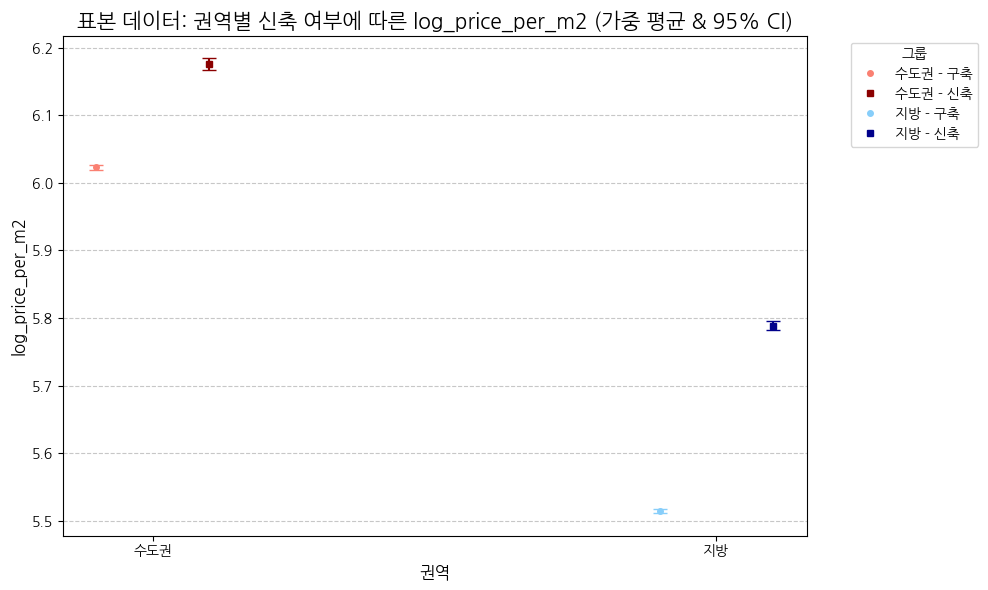


  Ïó∞ÎèÑÎ≥Ñ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ Ï∂îÏù¥ Î∂ÑÏÑù


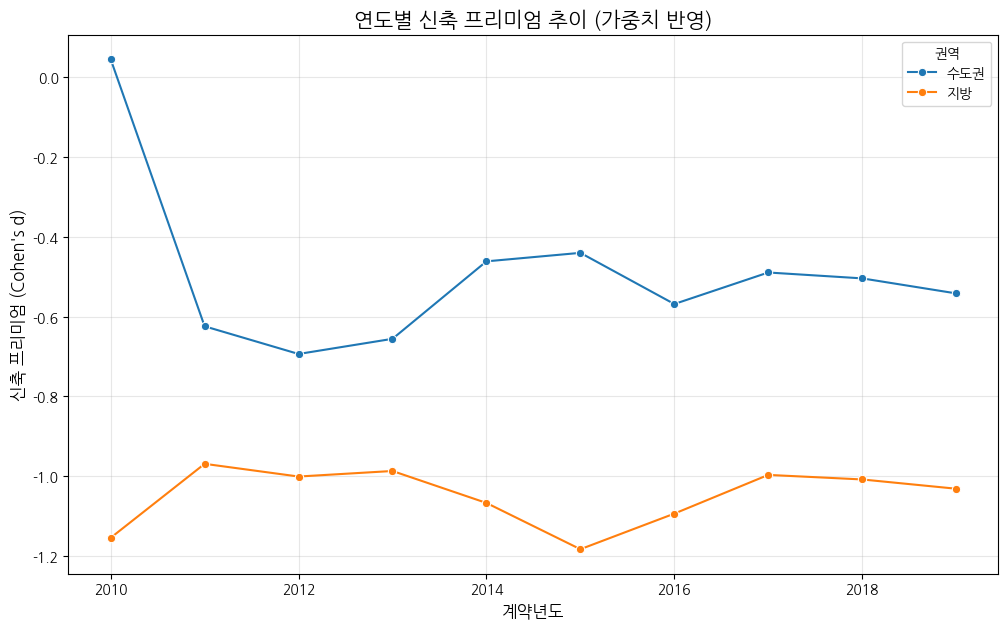


  ÏßÄÎ∞© ÎèÑÏãúÎ≥Ñ Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ log_price_per_m2 Î∂ÑÌè¨


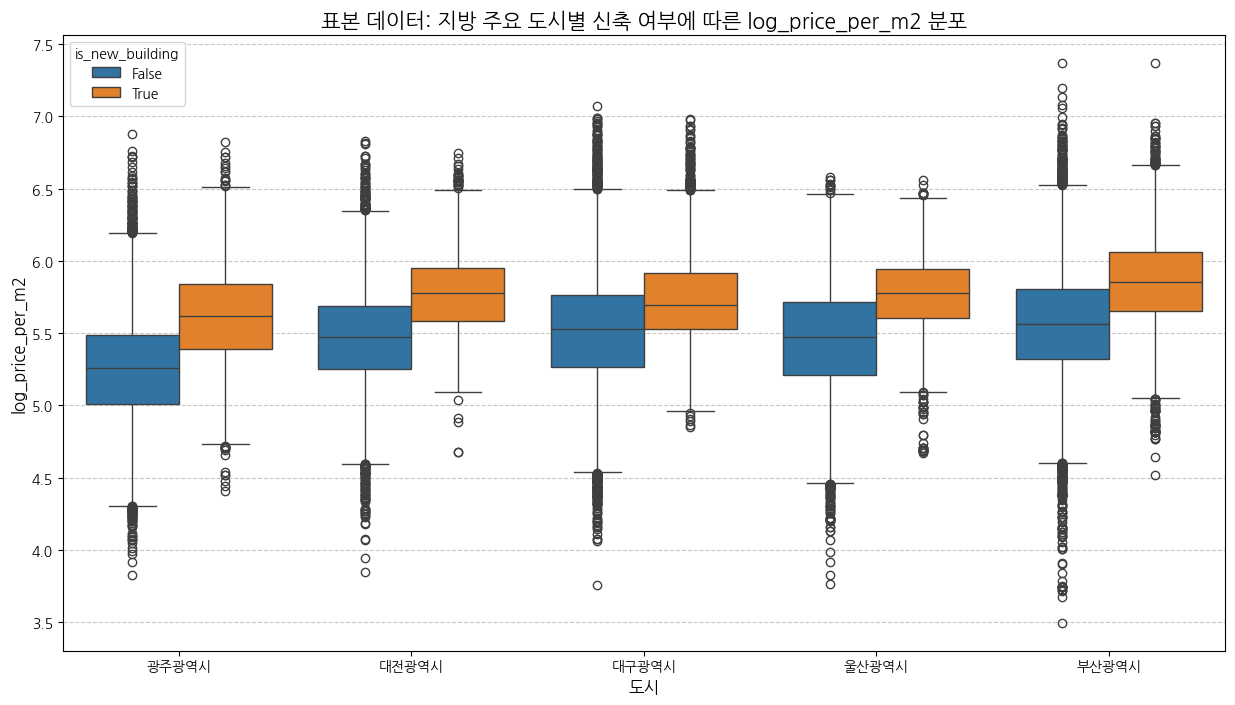


  Í∏∞Í∞ÑÎ≥Ñ (Ï†ÑÎ∞òÍ∏∞ vs ÌõÑÎ∞òÍ∏∞) Ïã†Ï∂ï Ìö®Í≥º Î≥ÄÌôî Î∂ÑÏÑù (WLS ANOVA)

    [ANOVA Í≤∞Í≥º]
                                        sum_sq        df             F  \
C(period_bin)                     6.039935e+06       1.0  38700.433343   
C(is_new_building)                8.599515e+05       1.0   5510.075170   
C(period_bin):C(is_new_building)  6.543438e+03       1.0     41.926589   
Residual                          3.472393e+07  222491.0           NaN   

                                        PR(>F)  
C(period_bin)                     0.000000e+00  
C(is_new_building)                0.000000e+00  
C(period_bin):C(is_new_building)  9.496138e-11  
Residual                                   NaN  

    Ï†ÑÎ∞òÍ∏∞: Cohen's d = -0.4342

    ÌõÑÎ∞òÍ∏∞: Cohen's d = -0.4945


In [7]:
# Î∂ÑÏÑù ÏÑ§Ï†ï
TARGET_VAR = 'log_price_per_m2'  # H3, H4Îäî ÌèâÎãπÍ∞ÄÏóê Ï¥àÏ†ê
NUM_VARS = ['Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'building_age']
CAT_VARS_BASE = ['area_bin', 'is_new_building', 'Í∂åÏó≠', 'Í≥ÑÏïΩÎÖÑÎèÑ']

# Îç∞Ïù¥ÌÑ∞ Î∞è Í∞ÄÏ§ëÏπò Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
if 'sampled_df' not in locals():
    raise ValueError("Ïù¥Ï†Ñ Îã®Í≥ÑÏùò sampled_dfÍ∞Ä ÏÉùÏÑ±ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

required_cols = ['weights', TARGET_VAR, 'Í∂åÏó≠', 'is_new_building', 'ÎèÑÏãú', 'Í≥ÑÏïΩÎÖÑÎèÑ']
missing_cols = [col for col in required_cols if col not in sampled_df.columns]
if missing_cols:
    raise ValueError(f"Îã§Ïùå ÌïÑÏàò Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§: {missing_cols}")

# Í∞ÄÏ§ëÏπò Ï†ÑÏ≤òÎ¶¨
if sampled_df['weights'].isna().any() or (sampled_df['weights'] <= 0).any():
    print("Í≤ΩÍ≥†: ÏùºÎ∂Ä Í∞ÄÏ§ëÏπòÍ∞Ä ÏóÜÍ±∞ÎÇò 0 Ïù¥ÌïòÏûÖÎãàÎã§. Ìï¥Îãπ ÌñâÎì§ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.", flush=True)
    original_len = len(sampled_df)
    sampled_df = sampled_df[sampled_df['weights'] > 0].copy()
    print(f"Ï†úÍ±∞Îêú Ìñâ Ïàò: {original_len - len(sampled_df)}", flush=True)

# period_bin ÏÉùÏÑ± (ÏóÜÎäî Í≤ΩÏö∞)
if 'period_bin' not in sampled_df.columns:
    sampled_df['period_bin'] = pd.cut(sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ'],
                                     bins=[2009, 2014, 2019],
                                     labels=['Ï†ÑÎ∞òÍ∏∞(2010-2014)', 'ÌõÑÎ∞òÍ∏∞(2015-2019)'])

# Í≤∞Í≥º Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎîïÏÖîÎÑàÎ¶¨
overall_correlation_results = {}
group_analysis_results = {}
regression_models = {}

print("\n--- Í∞ÄÏÑ§ H3, H4 Í≤ÄÏ¶ù ÏãúÏûë (Í≥ÑÏ∏µÌôî ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò) ---", flush=True)
print("----------------------------------------------------------", flush=True)

# --- 1. Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∞è Ï†ïÎ≥¥Îüâ Î∂ÑÏÑù ---
print("\n--- ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞: ÏàòÏπòÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∞è Ï†ïÎ≥¥Îüâ Î∂ÑÏÑù ---", flush=True)
target = TARGET_VAR
print(f"\n  ÌÉÄÍ≤ü: {target}", flush=True)

# Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò
pearson_corr = sampled_df[NUM_VARS + [target]].corr(method='pearson')[target].drop(target)
print("  [ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò)]", flush=True)
print(pearson_corr.sort_values(ascending=False), flush=True)

# ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ (MI)
mi_scores = {}
for num_var in NUM_VARS:
    try:
        mi = mutual_info_regression(sampled_df[[num_var]], sampled_df[target], random_state=42)[0]
        mi_scores[num_var] = mi
    except Exception as e:
        print(f"    {num_var} Î≥ÄÏàòÏùò MI Í≥ÑÏÇ∞ Ï§ë Ïò§Î•ò: {e}", flush=True)
        mi_scores[num_var] = np.nan

mi_series = pd.Series(mi_scores).sort_values(ascending=False)
print("  [ÏÉÅÌò∏ Ï†ïÎ≥¥Îüâ (MI - ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò)]", flush=True)
print(mi_series, flush=True)
overall_correlation_results[target] = {'pearson': pearson_corr.to_dict(), 'mi': mi_series.to_dict()}

# --- 2. Ìï®Ïàò Ï†ïÏùò ---
def weighted_cohens_d(data, var, group_var, weight_var):
    """Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Cohen's d Í≥ÑÏÇ∞"""
    try:
        groups = data[group_var].unique()
        if len(groups) != 2:
            return np.nan, "Í∑∏Î£πÏù¥ 2Í∞úÍ∞Ä ÏïÑÎãò"

        g1_mask = data[group_var] == groups[0]
        g2_mask = data[group_var] == groups[1]

        g1_data = data.loc[g1_mask, var]
        g2_data = data.loc[g2_mask, var]
        g1_weights = data.loc[g1_mask, weight_var]
        g2_weights = data.loc[g2_mask, weight_var]

        if len(g1_data) == 0 or len(g2_data) == 0:
            return np.nan, "Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°±"

        w1_sum = g1_weights.sum()
        w2_sum = g2_weights.sum()

        if w1_sum == 0 or w2_sum == 0:
            return np.nan, "Í∞ÄÏ§ëÏπò Ìï©Í≥ÑÍ∞Ä 0"

        weighted_mean1 = (g1_data * g1_weights).sum() / w1_sum
        weighted_mean2 = (g2_data * g2_weights).sum() / w2_sum

        weighted_var1 = (g1_weights * (g1_data - weighted_mean1)**2).sum() / w1_sum
        weighted_var2 = (g2_weights * (g2_data - weighted_mean2)**2).sum() / w2_sum

        if weighted_var1 <= 0 or weighted_var2 <= 0:
            return np.nan, "Î∂ÑÏÇ∞Ïù¥ 0 Ïù¥Ìïò"

        pooled_std = np.sqrt((w1_sum * weighted_var1 + w2_sum * weighted_var2) / (w1_sum + w2_sum))

        return (weighted_mean1 - weighted_mean2) / pooled_std, None

    except Exception as e:
        return np.nan, str(e)

def weighted_mean_ci(data, var, weight_var, confidence=0.95):
    """Í∞ÄÏ§ë ÌèâÍ∑†Í≥º Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞"""
    try:
        weights = data[weight_var]
        values = data[var]

        w_sum = weights.sum()
        if w_sum == 0:
            return np.nan, np.nan, np.nan

        weighted_mean = (values * weights).sum() / w_sum
        weighted_var = (weights * (values - weighted_mean)**2).sum() / w_sum
        n_eff = w_sum**2 / (weights**2).sum()

        se = np.sqrt(weighted_var / n_eff)
        z_score = stats.norm.ppf((1 + confidence) / 2)
        ci_lower = weighted_mean - z_score * se
        ci_upper = weighted_mean + z_score * se

        return weighted_mean, ci_lower, ci_upper

    except Exception as e:
        print(f"Í∞ÄÏ§ë ÌèâÍ∑†/CI Í≥ÑÏÇ∞ Ï§ë Ïò§Î•ò: {e}", flush=True)
        return np.nan, np.nan, np.nan

# --- 3. Í∑∏Î£πÎ≥Ñ Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù ---
print("\n--- Í∑∏Î£πÎ≥Ñ Î∂ÑÌè¨ Î∞è Ï∞®Ïù¥ Î∂ÑÏÑù (H3, H4 Í¥ÄÎ†®) ---", flush=True)

# Cohen's d Î∂ÑÏÑù
print("\n  Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Cohen's d Ìö®Í≥º ÌÅ¨Í∏∞ Í≥ÑÏÇ∞ (Í∂åÏó≠Î≥Ñ Ïã†Ï∂ï vs Íµ¨Ï∂ï)", flush=True)
cohens_d_results = {}
for region in ['ÏàòÎèÑÍ∂å', 'ÏßÄÎ∞©']:
    region_data = sampled_df[sampled_df['Í∂åÏó≠'] == region]
    d_value, error_msg = weighted_cohens_d(region_data, TARGET_VAR, 'is_new_building', 'weights')

    if not np.isnan(d_value):
        cohens_d_results[region] = d_value
        effect_size = (
            "ÌÅ∞ Ìö®Í≥º" if abs(d_value) >= 0.8 else
            "Ï§ëÍ∞Ñ Ìö®Í≥º" if abs(d_value) >= 0.5 else
            "ÏûëÏùÄ Ìö®Í≥º" if abs(d_value) >= 0.2 else
            "Î¨¥ÏãúÌï† Ïàò ÏûàÎäî Ìö®Í≥º"
        )
        print(f"    {region}: Cohen's d = {d_value:.4f} ({effect_size})", flush=True)
    else:
        print(f"    {region}: Cohen's d Í≥ÑÏÇ∞ Ïã§Ìå® ({error_msg})", flush=True)

# 2x2 ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú
print("\n  2x2 ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú: Í∂åÏó≠ √ó Ïã†Ï∂ï Ïó¨Î∂ÄÎ≥Ñ Í∞ÄÏ§ë ÌèâÍ∑† Î∞è 95% CI", flush=True)
plot_data = []

for (region, is_new), group in sampled_df.groupby(['Í∂åÏó≠', 'is_new_building']):
    if not group.empty:
        mean, ci_lower, ci_upper = weighted_mean_ci(group, TARGET_VAR, 'weights')
        plot_data.append({
            'Í∂åÏó≠': region,
            'is_new_building': is_new,
            'weighted_mean': mean,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper
        })

plot_df_interaction = pd.DataFrame(plot_data)

# Í≤∞Í≥º Ï∂úÎ†• Î∞è ÏãúÍ∞ÅÌôî
if not plot_df_interaction.empty:
    print("\n    [Í∞ÄÏ§ë ÌèâÍ∑† Î∞è Ïã†Î¢∞Íµ¨Í∞Ñ]", flush=True)
    for region in ['ÏàòÎèÑÍ∂å', 'ÏßÄÎ∞©']:
        region_data = plot_df_interaction[plot_df_interaction['Í∂åÏó≠'] == region]
        print(f"\n    {region}:", flush=True)
        for is_new in [False, True]:
            row = region_data[region_data['is_new_building'] == is_new].iloc[0]
            print(f"      {'Ïã†Ï∂ï' if is_new else 'Íµ¨Ï∂ï'}: "
                  f"{row['weighted_mean']:.4f} "
                  f"[{row['ci_lower']:.4f}, {row['ci_upper']:.4f}]", flush=True)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 6))
    regions_plot = ['ÏàòÎèÑÍ∂å', 'ÏßÄÎ∞©']
    new_status_plot = [False, True]

    colors = {
        ('ÏàòÎèÑÍ∂å', False): 'salmon',
        ('ÏàòÎèÑÍ∂å', True): 'darkred',
        ('ÏßÄÎ∞©', False): 'lightskyblue',
        ('ÏßÄÎ∞©', True): 'darkblue'
    }
    markers = {False: 'o', True: 's'}

    x_positions = np.arange(len(regions_plot))
    width = 0.2

    # Î≤îÎ°ÄÏö© ÎçîÎØ∏ ÌîåÎ°Ø
    for (region, is_new), color_val in colors.items():
        plt.plot([], [], marker=markers[is_new], linestyle='None', markersize=4, color=color_val,
                 label=f"{region} - {'Ïã†Ï∂ï' if is_new else 'Íµ¨Ï∂ï'}")

    # ÏóêÎü¨Î∞î Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
    for i, region in enumerate(regions_plot):
        for j, is_new in enumerate(new_status_plot):
            subset = plot_df_interaction[(plot_df_interaction['Í∂åÏó≠'] == region) &
                                       (plot_df_interaction['is_new_building'] == is_new)]

            if not subset.empty and not pd.isna(subset['weighted_mean'].iloc[0]):
                mean_val = subset['weighted_mean'].iloc[0]
                ci_low = subset['ci_lower'].iloc[0]
                ci_high = subset['ci_upper'].iloc[0]

                x_offset = x_positions[i] + (j - 0.5) * width

                try:
                    if not (pd.isna(ci_low) or pd.isna(ci_high)):
                        yerr_low = mean_val - ci_low
                        yerr_high = ci_high - mean_val
                        plt.errorbar(x=x_offset, y=mean_val,
                                   yerr=[[yerr_low], [yerr_high]],
                                   fmt=markers[is_new], capsize=5, markersize=4,
                                   color=colors[(region, is_new)])
                    else:
                        plt.plot(x_offset, mean_val, marker=markers[is_new], markersize=4,
                                color=colors[(region, is_new)])
                except Exception as e:
                    print(f"    ÏóêÎü¨Î∞î Í∑∏Î¶¨Í∏∞ Ï§ë Ïò§Î•ò ({region}, {is_new}): {e}", flush=True)
                    plt.plot(x_offset, mean_val, marker=markers[is_new], markersize=4,
                            color=colors[(region, is_new)])

    plt.xticks(ticks=x_positions, labels=regions_plot)
    plt.legend(title='Í∑∏Î£π', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞: Í∂åÏó≠Î≥Ñ Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ log_price_per_m2 (Í∞ÄÏ§ë ÌèâÍ∑† & 95% CI)', fontsize=15)
    plt.xlabel('Í∂åÏó≠', fontsize=12)
    plt.ylabel('log_price_per_m2', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ïó∞ÎèÑÎ≥Ñ Ìä∏Î†åÎìú Î∂ÑÏÑù
print("\n  Ïó∞ÎèÑÎ≥Ñ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ Ï∂îÏù¥ Î∂ÑÏÑù", flush=True)
try:
    yearly_premium = []
    for (region, year) in sampled_df.groupby(['Í∂åÏó≠', 'Í≥ÑÏïΩÎÖÑÎèÑ']).groups:
        year_data = sampled_df[(sampled_df['Í∂åÏó≠'] == region) &
                              (sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ'] == year)]

        d_value, error_msg = weighted_cohens_d(year_data, TARGET_VAR,
                                             'is_new_building', 'weights')

        if not np.isnan(d_value):
            yearly_premium.append({
                'Í∂åÏó≠': region,
                'Í≥ÑÏïΩÎÖÑÎèÑ': year,
                'premium': d_value
            })

    yearly_premium_df = pd.DataFrame(yearly_premium)

    if not yearly_premium_df.empty:
        plt.figure(figsize=(12, 7))
        sns.lineplot(data=yearly_premium_df, x='Í≥ÑÏïΩÎÖÑÎèÑ', y='premium',
                    hue='Í∂åÏó≠', marker='o')
        plt.title('Ïó∞ÎèÑÎ≥Ñ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ Ï∂îÏù¥ (Í∞ÄÏ§ëÏπò Î∞òÏòÅ)', fontsize=15)
        plt.xlabel('Í≥ÑÏïΩÎÖÑÎèÑ', fontsize=12)
        plt.ylabel('Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ (Cohen\'s d)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.show()
except Exception as e:
    print(f"  Ïó∞ÎèÑÎ≥Ñ Ìä∏Î†åÎìú Î∂ÑÏÑù Ï§ë Ïò§Î•ò: {e}", flush=True)

# ÎèÑÏãúÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø Ï∂îÍ∞Ä
print("\n  ÏßÄÎ∞© ÎèÑÏãúÎ≥Ñ Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ log_price_per_m2 Î∂ÑÌè¨", flush=True)
try:
    local_cities_names = sampled_df[sampled_df['Í∂åÏó≠'] == 'ÏßÄÎ∞©']['ÎèÑÏãú'].unique().tolist()
    local_df = sampled_df[sampled_df['ÎèÑÏãú'].isin(local_cities_names)].copy()

    if not local_df.empty and len(local_cities_names) > 1:
        plt.figure(figsize=(15, 8))
        sns.boxplot(x='ÎèÑÏãú', y=TARGET_VAR, hue='is_new_building', data=local_df)
        plt.title('ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞: ÏßÄÎ∞© Ï£ºÏöî ÎèÑÏãúÎ≥Ñ Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ log_price_per_m2 Î∂ÑÌè¨', fontsize=15)
        plt.xlabel('ÎèÑÏãú', fontsize=12)
        plt.ylabel('log_price_per_m2', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("  ÏßÄÎ∞© ÎèÑÏãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÌÑ∞ÎßÅ/ÏÉòÌîåÎßÅÎêòÏñ¥ Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.", flush=True)
except Exception as e:
    print(f"  ÏßÄÎ∞© ÎèÑÏãúÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø ÏÉùÏÑ± Ï§ë Ïò§Î•ò: {e}", flush=True)

# Ï†Ñ/ÌõÑÎ∞òÍ∏∞ ÎπÑÍµê Î∂ÑÏÑù Ï∂îÍ∞Ä
print("\n  Í∏∞Í∞ÑÎ≥Ñ (Ï†ÑÎ∞òÍ∏∞ vs ÌõÑÎ∞òÍ∏∞) Ïã†Ï∂ï Ìö®Í≥º Î≥ÄÌôî Î∂ÑÏÑù (WLS ANOVA)", flush=True)

# period_bin ÌôïÏù∏ Î∞è ÏÉùÏÑ±
if 'period_bin' not in sampled_df.columns:
    sampled_df['period_bin'] = pd.cut(
        sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ'],
        bins=[2009, 2014, 2019],
        labels=['Ï†ÑÎ∞òÍ∏∞(2010-2014)', 'ÌõÑÎ∞òÍ∏∞(2015-2019)'],
        include_lowest=True
    )

try:
    # period_bin Îç∞Ïù¥ÌÑ∞ Ïú†Ìö®ÏÑ± ÌôïÏù∏
    if sampled_df['period_bin'].isna().all():
        raise ValueError("Î™®Îì† period_bin Í∞íÏù¥ NaNÏûÖÎãàÎã§.")

    if sampled_df['period_bin'].nunique() < 2:
        raise ValueError("period_binÏù¥ Ï∂©Î∂ÑÌïú Î≤îÏ£ºÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏßÄ ÏïäÏäµÎãàÎã§.")

    # ANOVA Î∂ÑÏÑù
    formula = f'{TARGET_VAR} ~ C(period_bin) * C(is_new_building)'
    model = smf.wls(formula, data=sampled_df, weights=sampled_df['weights']).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\n    [ANOVA Í≤∞Í≥º]", flush=True)
    print(anova_table, flush=True)

    # Í≤∞Í≥º Ï†ÄÏû•
    group_analysis_results['period_anova'] = anova_table.to_dict()

    # Í∏∞Í∞ÑÎ≥Ñ Ìö®Í≥º ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
    period_effects = {}
    for period in sampled_df['period_bin'].unique():
        period_data = sampled_df[sampled_df['period_bin'] == period]
        d_value, error_msg = weighted_cohens_d(period_data, TARGET_VAR, 'is_new_building', 'weights')
        if not np.isnan(d_value):
            print(f"\n    {period}: Cohen's d = {d_value:.4f}", flush=True)
            period_effects[str(period)] = d_value

    # Í∏∞Í∞ÑÎ≥Ñ Ìö®Í≥º ÌÅ¨Í∏∞ÎèÑ Ï†ÄÏû•
    group_analysis_results['period_effects'] = period_effects

except Exception as e:
    print(f"  Í∏∞Í∞ÑÎ≥Ñ Î∂ÑÏÑù Ï§ë Ïò§Î•ò: {e}", flush=True)
    print("  Ïò§Î•ò ÏÉÅÏÑ∏:", flush=True)
    import traceback
    print(traceback.format_exc(), flush=True)

In [8]:
# --- 4. Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑù (WLS, ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©) ---
print("\n--- ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞: Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑù (WLS Ï†ÅÏö©, ÍµêÎûÄ Î≥ÄÏàò ÌÜµÏ†ú, ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ìè¨Ìï®) ---", flush=True)

# Îç∞Ïù¥ÌÑ∞ Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
required_cols = ['weights', TARGET_VAR, 'Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'building_age',
                'area_bin', 'is_new_building', 'Í∂åÏó≠', 'Í≥ÑÏïΩÎÖÑÎèÑ', 'ÎèÑÏãú']
missing_cols = [col for col in required_cols if col not in sampled_df.columns]
if missing_cols:
    raise ValueError(f"ÌöåÍ∑ÄÎ∂ÑÏÑùÏóê ÌïÑÏöîÌïú Îã§Ïùå Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§: {missing_cols}")

# Î≥ÄÏàò Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨
numeric_cols = ['Ï†ÑÏö©Î©¥Ï†Å(„é°)', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'building_age']
for col in numeric_cols:
    if sampled_df[col].isna().any():
        print(f"Í≤ΩÍ≥†: {col}Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏäµÎãàÎã§.", flush=True)

# ÎπÑÏÑ†Ìòï ÏãúÍ∞Ñ Ìä∏Î†åÎìú Ï≤òÎ¶¨
sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ_centered'] = sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ'] - sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ'].mean()
sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ_sq'] = sampled_df['Í≥ÑÏïΩÎÖÑÎèÑ_centered']**2

# Í∏∞Î≥∏ Î™®Îç∏
print("\n  [Í∏∞Î≥∏ Î™®Îç∏: log_price_per_m2Ïóê ÎåÄÌïú WLS ÌöåÍ∑ÄÎ∂ÑÏÑù]", flush=True)
base_formula = (
    f'{TARGET_VAR} ~ Q("Ï†ÑÏö©Î©¥Ï†Å(„é°)") + Q("Í±¥Ï∂ïÎÖÑÎèÑ") + building_age + '
    f'C(area_bin) + C(is_new_building) + C(Í∂åÏó≠) + C(Í≥ÑÏïΩÎÖÑÎèÑ)'
)
try:
    model_base = smf.wls(base_formula, data=sampled_df, weights=sampled_df['weights']).fit()
    print(model_base.summary(), flush=True)
    regression_models['base_model'] = model_base
except Exception as e:
    print(f"    Í∏∞Î≥∏ Î™®Îç∏ ÌöåÍ∑ÄÎ∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}", flush=True)
    regression_models['base_model'] = None

# ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ - ÏàòÏ†ïÎêú Í≥µÏãùÏúºÎ°ú ÍµêÏ≤¥
print("\n  [ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏: C(Í∂åÏó≠):C(is_new_building) Î∞è C(Í∂åÏó≠):C(Í≥ÑÏïΩÎÖÑÎèÑ) Ìè¨Ìï®]", flush=True)
interaction_formula = (
    f'{TARGET_VAR} ~ Q("Ï†ÑÏö©Î©¥Ï†Å(„é°)") + Q("Í±¥Ï∂ïÎÖÑÎèÑ") + building_age + '
    f'C(area_bin) + C(is_new_building) * C(Í∂åÏó≠) + '
    f'C(Í≥ÑÏïΩÎÖÑÎèÑ) * C(Í∂åÏó≠) + Í≥ÑÏïΩÎÖÑÎèÑ_sq * C(Í∂åÏó≠)'  # ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ
)
try:
    model_interaction = smf.wls(interaction_formula, data=sampled_df, weights=sampled_df['weights']).fit()
    print(model_interaction.summary(), flush=True)
    regression_models['interaction_model'] = model_interaction
except Exception as e:
    print(f"    ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ ÌöåÍ∑ÄÎ∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}", flush=True)
    regression_models['interaction_model'] = None

# ÎèÑÏãúÎ≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏ (ÏßÄÎ∞© Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©)
print("\n  [ÎèÑÏãúÎ≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏: ÏßÄÎ∞© Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©, C(ÎèÑÏãú):C(is_new_building) ÏÉÅÌò∏ÏûëÏö©]", flush=True)
local_only_df = sampled_df[sampled_df['Í∂åÏó≠'] == 'ÏßÄÎ∞©'].copy()
if not local_only_df.empty and 'ÎèÑÏãú' in local_only_df.columns and local_only_df['ÎèÑÏãú'].nunique() > 1:
    local_segment_formula = (
        f'{TARGET_VAR} ~ Q("Ï†ÑÏö©Î©¥Ï†Å(„é°)") + Q("Í±¥Ï∂ïÎÖÑÎèÑ") + building_age + '
        f'C(area_bin) + C(is_new_building) * C(ÎèÑÏãú) + C(Í≥ÑÏïΩÎÖÑÎèÑ)'
    )
    try:
        model_local_segment = smf.wls(local_segment_formula, data=local_only_df, weights=local_only_df['weights']).fit()
        print(model_local_segment.summary(), flush=True)
        regression_models['local_segment_model'] = model_local_segment
    except Exception as e:
        print(f"    ÏßÄÎ∞© ÎèÑÏãúÎ≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏ ÌöåÍ∑ÄÎ∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}", flush=True)
        regression_models['local_segment_model'] = None
else:
    print("    ÏßÄÎ∞© Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÍ±∞ÎÇò, ÎèÑÏãú ÏàòÍ∞Ä Î∂ÄÏ°±ÌïòÏó¨ ÎèÑÏãúÎ≥Ñ ÏÑ∏Î∂ÑÌôî Î™®Îç∏ÏùÑ ÏàòÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.", flush=True)

print("\n--- H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Îã®Í≥Ñ ÏôÑÎ£å ---", flush=True)
print("----------------------------------------------------------", flush=True)


--- ÌëúÎ≥∏ Îç∞Ïù¥ÌÑ∞: Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑù (WLS Ï†ÅÏö©, ÍµêÎûÄ Î≥ÄÏàò ÌÜµÏ†ú, ÏÉÅÌò∏ÏûëÏö© Ìï≠ Ìè¨Ìï®) ---

  [Í∏∞Î≥∏ Î™®Îç∏: log_price_per_m2Ïóê ÎåÄÌïú WLS ÌöåÍ∑ÄÎ∂ÑÏÑù]
                            WLS Regression Results                            
Dep. Variable:       log_price_per_m2   R-squared:                       0.385
Model:                            WLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     8182.
Date:                Sun, 24 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:04:11   Log-Likelihood:            -1.3363e+05
No. Observations:              222495   AIC:                         2.673e+05
Df Residuals:                  222477   BIC:                         2.675e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coe

In [9]:
print("\n=== H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú Ï†ÄÏû•Îêú Í≤∞Í≥º ÌôïÏù∏ ===", flush=True)

# 1. ÌöåÍ∑ÄÎ™®Îç∏ Í≤∞Í≥º ÌôïÏù∏
print("\n1. Ï†ÄÏû•Îêú ÌöåÍ∑ÄÎ™®Îç∏ ÌôïÏù∏", flush=True)
print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏:", list(regression_models.keys()), flush=True)

if 'interaction_model' in regression_models and regression_models['interaction_model'] is not None:
    model = regression_models['interaction_model']
    print("\nÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ Ï£ºÏöî Í≥ÑÏàò:", flush=True)
    try:
        # Ïã†Ï∂ï Í¥ÄÎ†® Í≥ÑÏàòÎßå Ï∂îÏ∂ú
        new_building_params = model.params[model.params.index.str.contains('is_new_building', case=False)]
        new_building_pvalues = model.pvalues[model.pvalues.index.str.contains('is_new_building', case=False)]

        for param, pvalue in zip(new_building_params.items(), new_building_pvalues.items()):
            print(f"  {param[0]}: {param[1]:.4f} (p-value: {pvalue[1]:.4f})", flush=True)
    except Exception as e:
        print(f"  ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ Í≥ÑÏàò Ï∂îÏ∂ú Ï§ë Ïò§Î•ò: {e}", flush=True)
else:
    print("  ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ Í≤∞Í≥º ÏóÜÏùå", flush=True)

# 2. Cohen's d Í≤∞Í≥º ÌôïÏù∏
print("\n2. Cohen's d Ìö®Í≥º ÌÅ¨Í∏∞ Í≤∞Í≥º ÌôïÏù∏", flush=True)
try:
    print("Ï†ÄÏû•Îêú Cohen's d Í≤∞Í≥º:", cohens_d_results, flush=True)
except NameError:
    print("  Cohen's d Í≤∞Í≥ºÍ∞Ä Ï†ÄÏû•ÎêòÏßÄ ÏïäÏùå", flush=True)

# 3. ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\n3. ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏", flush=True)
try:
    print("plot_df_interaction Íµ¨Ï°∞:", flush=True)
    print(plot_df_interaction.head(), flush=True)
except NameError:
    print("  ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•ÎêòÏßÄ ÏïäÏùå", flush=True)

# 4. Ïó∞ÎèÑÎ≥Ñ ÌîÑÎ¶¨ÎØ∏ÏóÑ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\n4. Ïó∞ÎèÑÎ≥Ñ ÌîÑÎ¶¨ÎØ∏ÏóÑ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏", flush=True)
try:
    print("yearly_premium_df Íµ¨Ï°∞:", flush=True)
    print(yearly_premium_df.head(), flush=True)
except NameError:
    print("  Ïó∞ÎèÑÎ≥Ñ ÌîÑÎ¶¨ÎØ∏ÏóÑ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•ÎêòÏßÄ ÏïäÏùå", flush=True)

# 5. Í∏∞Í∞ÑÎ≥Ñ ANOVA Í≤∞Í≥º ÌôïÏù∏
print("\n5. Í∏∞Í∞ÑÎ≥Ñ ANOVA Í≤∞Í≥º ÌôïÏù∏", flush=True)
try:
    if 'period_anova' in group_analysis_results:
        print("Í∏∞Í∞ÑÎ≥Ñ ANOVA Í≤∞Í≥º:", flush=True)
        print(group_analysis_results['period_anova'], flush=True)
    else:
        print("  Í∏∞Í∞ÑÎ≥Ñ ANOVA Í≤∞Í≥ºÍ∞Ä Ï†ÄÏû•ÎêòÏßÄ ÏïäÏùå", flush=True)
except NameError:
    print("  group_analysis_resultsÍ∞Ä Ï†ïÏùòÎêòÏßÄ ÏïäÏùå", flush=True)

print("\n=== Í≤∞Í≥º ÌôïÏù∏ ÏôÑÎ£å ===", flush=True)


=== H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú Ï†ÄÏû•Îêú Í≤∞Í≥º ÌôïÏù∏ ===

1. Ï†ÄÏû•Îêú ÌöåÍ∑ÄÎ™®Îç∏ ÌôïÏù∏
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏: ['base_model', 'interaction_model', 'local_segment_model']

ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ Ï£ºÏöî Í≥ÑÏàò:
  C(is_new_building)[T.True]: 0.1038 (p-value: 0.0000)
  C(is_new_building)[T.True]:C(Í∂åÏó≠)[T.ÏßÄÎ∞©]: 0.1366 (p-value: 0.0000)

2. Cohen's d Ìö®Í≥º ÌÅ¨Í∏∞ Í≤∞Í≥º ÌôïÏù∏
Ï†ÄÏû•Îêú Cohen's d Í≤∞Í≥º: {'ÏàòÎèÑÍ∂å': np.float64(-0.3548086848964265), 'ÏßÄÎ∞©': np.float64(-0.7425649778027055)}

3. ÏÉÅÌò∏ÏûëÏö© Í∑∏Î¶¨Îìú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
plot_df_interaction Íµ¨Ï°∞:
    Í∂åÏó≠  is_new_building  weighted_mean  ci_lower  ci_upper
0  ÏàòÎèÑÍ∂å            False       6.022856  6.019602  6.026110
1  ÏàòÎèÑÍ∂å             True       6.175821  6.167560  6.184082
2   ÏßÄÎ∞©            False       5.514946  5.511626  5.518266
3   ÏßÄÎ∞©             True       5.788979  5.782986  5.794973

4. Ïó∞ÎèÑÎ≥Ñ ÌîÑÎ¶¨ÎØ∏ÏóÑ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
yearly_premium_df Íµ¨Ï°∞:
    Í∂åÏó≠  Í≥ÑÏïΩÎÖÑÎèÑ   prem


=== H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º Î∂ÑÏÑù ===

## H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º ÏöîÏïΩ

‚úÖ H3 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º:
H3. Ïã†Ï∂ï Ïó¨Î∂Ä(is_new_building)Îäî ÌèâÎãπÍ∞Ä(log_price_per_m2)Ïóê ÏßÄÏó≠Î≥ÑÎ°ú Ï§ë~ÌÅ∞ Ï∞®Î≥Ñ Ìö®Í≥ºÎ•º Í∞ÄÏßÑÎã§.
Í≤∞Î°†: ‚úîÔ∏è Ï±ÑÌÉù
Í∑ºÍ±∞:
- ÏàòÎèÑÍ∂å Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ: 16.53%
- ÏßÄÎ∞© Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ: 31.53%
- Í∏∞Î≥∏ Ïã†Ï∂ï Ìö®Í≥º Í≥ÑÏàò: 0.1038 (p-value: 0.0000)

‚úÖ H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º:
H4. ÏàòÎèÑÍ∂åÎ≥¥Îã§Îäî ÏßÄÎ∞©ÏóêÏÑú Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í∞ÄÍ≤© ÏòÅÌñ•Î†•Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÅ¨Îã§.
Í≤∞Î°†: ‚úîÔ∏è Ï±ÑÌÉù
Í∑ºÍ±∞:
- ÏßÄÎ∞© Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑÏù¥ ÏàòÎèÑÍ∂å ÎåÄÎπÑ 1.91Î∞∞
- ÏßÄÎ∞© Ïã†Ï∂ï ÏïÑÌååÌä∏Í∞Ä ÌèâÎãπ 15.00% ÎÜíÏùÄ ÌîÑÎ¶¨ÎØ∏ÏóÑ
- ÏßÄÏó≠ ÏÉÅÌò∏ÏûëÏö© Í≥ÑÏàò: 0.1366 (p-value: 0.0000)

### Ìà¨Ïûê Îß§Î†•ÎèÑ ÌèâÍ∞Ä (H3, H4 Í∞ÄÏÑ§ Í∏∞Î∞ò)

üí∞ ÏßÄÎ∞© Ïã†Ï∂ï ÏïÑÌååÌä∏ Ìà¨Ïûê Îß§Î†•:
H3, H4 Í∞ÄÏÑ§Ïù¥ Î™®Îëê ÏßÄÏßÄÎêòÎØÄÎ°ú, ÌäπÌûà ÏßÄÎ∞© Í¥ëÏó≠ÏãúÏùò Ïã†Ï∂ï ÏïÑÌååÌä∏Îäî ÏàòÎèÑÍ∂å ÎåÄÎπÑ ÎÜíÏùÄ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑÍ≥º Îçî ÌÅ∞ Í∞ÄÍ≤© ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßà 

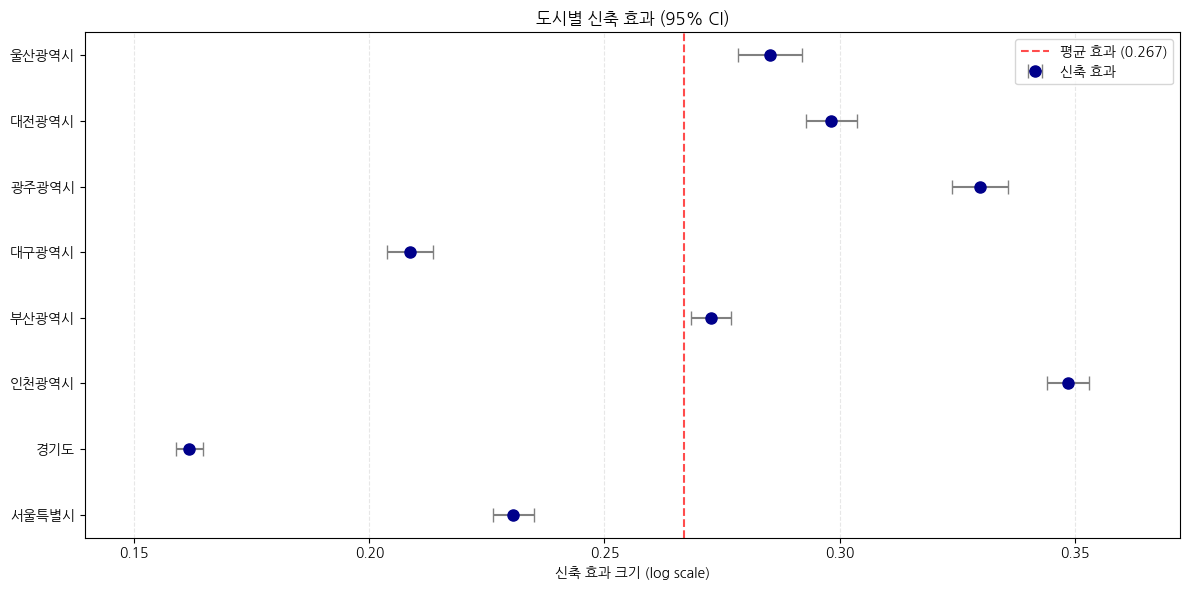

In [10]:
print("\n=== H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º Î∂ÑÏÑù ===", flush=True)

# 1. ÏãúÍ∞ÅÌôî Ìï®ÏàòÎì§
def plot_forest():
    """ÎèÑÏãúÎ≥Ñ Ïã†Ï∂ï Ìö®Í≥º Forest Plot"""
    plt.figure(figsize=(12, 6))

    # ÎèÑÏãúÎ≥Ñ Î™®Îç∏ Í≤∞Í≥º Ï∂îÏ∂ú
    cities = ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 'Í≤ΩÍ∏∞ÎèÑ', 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú']
    effects = []

    for city in cities:
        city_data = sampled_df[sampled_df['ÎèÑÏãú'] == city]
        if len(city_data) > 0:  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå Ï≤òÎ¶¨
            # ÎèÑÏãúÎ≥Ñ Ïã†Ï∂ï Ìö®Í≥º Í≥ÑÏÇ∞
            old = np.average(
                city_data[~city_data['is_new_building']]['log_price_per_m2'],
                weights=city_data[~city_data['is_new_building']]['weights']
            )
            new = np.average(
                city_data[city_data['is_new_building']]['log_price_per_m2'],
                weights=city_data[city_data['is_new_building']]['weights']
            )
            effect = new - old

            # ÌëúÏ§ÄÏò§Ï∞® Í≥ÑÏÇ∞ (Í∞ÄÏ§ëÏπò Ï†ÅÏö©)
            n_eff = len(city_data)  # Ïú†Ìö® ÌëúÎ≥∏ ÌÅ¨Í∏∞
            se = np.sqrt(city_data['log_price_per_m2'].var() / n_eff)

            effects.append({
                'city': city,
                'effect': effect,
                'ci_lower': effect - 1.96 * se,
                'ci_upper': effect + 1.96 * se
            })

    if effects:  # Í≤∞Í≥ºÍ∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå Ï≤òÎ¶¨
        effects_df = pd.DataFrame(effects)

        # ÌèâÍ∑† Ìö®Í≥º Í≥ÑÏÇ∞
        mean_effect = effects_df['effect'].mean()

        # yÏ∂ï ÏúÑÏπò Ï°∞Ï†ï (Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî ÎèÑÏãúÎßå)
        y_positions = range(len(effects_df))

        # Ìö®Í≥º ÌÅ¨Í∏∞Ïùò ÏµúÏÜåÍ∞í Ï∞æÍ∏∞
        min_effect = effects_df['ci_lower'].min()
        max_effect = effects_df['ci_upper'].max()

        # Forest Plot
        plt.errorbar(effects_df['effect'], y_positions,
                    xerr=[effects_df['effect'] - effects_df['ci_lower'],
                          effects_df['ci_upper'] - effects_df['effect']],
                    fmt='o', capsize=5, color='darkblue', markersize=8,
                    ecolor='gray', label='Ïã†Ï∂ï Ìö®Í≥º')

        # ÌèâÍ∑†ÏÑ† Ï∂îÍ∞Ä
        plt.axvline(x=mean_effect, color='red', linestyle='--', alpha=0.7,
                   label=f'ÌèâÍ∑† Ìö®Í≥º ({mean_effect:.3f})')

        # Ï∂ï ÏÑ§Ï†ï
        plt.yticks(y_positions, effects_df['city'])
        plt.xlabel('Ïã†Ï∂ï Ìö®Í≥º ÌÅ¨Í∏∞ (log scale)')
        plt.title('ÎèÑÏãúÎ≥Ñ Ïã†Ï∂ï Ìö®Í≥º (95% CI)')

        # Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
        plt.grid(True, axis='x', linestyle='--', alpha=0.3)

        # xÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï (Ïó¨Î∞± Ï∂îÍ∞Ä)
        margin = (max_effect - min_effect) * 0.1
        plt.xlim(min_effect - margin, max_effect + margin)

        # Î≤îÎ°Ä Ï∂îÍ∞Ä
        plt.legend(loc='best')

        plt.tight_layout()
        plt.show()
    else:
        print("ÎèÑÏãúÎ≥Ñ Ìö®Í≥ºÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.", flush=True)

def plot_heatmap():
    """Í∂åÏó≠√óÍ≥ÑÏïΩÎÖÑÎèÑÎ≥Ñ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌûàÌä∏Îßµ"""
    plt.figure(figsize=(12, 6))

    # Ïó∞ÎèÑÎ≥Ñ, Í∂åÏó≠Î≥Ñ Ïã†Ï∂ï/Íµ¨Ï∂ï ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞
    premium_data = []

    for (region, year), group in sampled_df.groupby(['Í∂åÏó≠', 'Í≥ÑÏïΩÎÖÑÎèÑ']):
        # Ïã†Ï∂ï/Íµ¨Ï∂ï ÌèâÍ∑† Í∞ÄÍ≤© Í≥ÑÏÇ∞ (Í∞ÄÏ§ëÏπò Ï†ÅÏö©)
        new_price = np.average(
            group[group['is_new_building']]['log_price_per_m2'],
            weights=group[group['is_new_building']]['weights']
        )
        old_price = np.average(
            group[~group['is_new_building']]['log_price_per_m2'],
            weights=group[~group['is_new_building']]['weights']
        )

        # ÌîÑÎ¶¨ÎØ∏ÏóÑ Í≥ÑÏÇ∞ (%)
        premium_percent = (np.exp(new_price - old_price) - 1) * 100

        premium_data.append({
            'Í∂åÏó≠': region,
            'Í≥ÑÏïΩÎÖÑÎèÑ': year,
            'premium': premium_percent
        })

    premium_df = pd.DataFrame(premium_data)

    # Îç∞Ïù¥ÌÑ∞ ÌîºÎ≤ó
    premium_pivot = premium_df.pivot(index='Í∂åÏó≠', columns='Í≥ÑÏïΩÎÖÑÎèÑ', values='premium')

    # ÌûàÌä∏Îßµ
    sns.heatmap(premium_pivot, cmap='RdYlBu_r', center=0,
                annot=True, fmt='.1f',
                cbar_kws={'label': 'Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ (%)'})
    plt.title('Í∂åÏó≠√óÍ≥ÑÏïΩÎÖÑÎèÑÎ≥Ñ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ (%)')
    plt.show()

def calculate_liquidity_adjusted_index():
    """Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπòÎ•º ÌôúÏö©Ìïú Ïú†ÎèôÏÑ± Ï°∞Ï†ï Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò ÏÇ∞Ï∂ú"""
    results = {}

    for region in ['ÏàòÎèÑÍ∂å', 'ÏßÄÎ∞©']:
        region_data = sampled_df[sampled_df['Í∂åÏó≠'] == region]

        # Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ
        premium = np.exp(cohens_d_results[region]) - 1

        # Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπò
        volume_weight = region_data['weights'].sum() / sampled_df['weights'].sum()

        # Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò (ÌîÑÎ¶¨ÎØ∏ÏóÑ √ó Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπò)
        index = premium * volume_weight

        results[region] = {
            'premium': premium,
            'volume_weight': volume_weight,
            'index': index
        }

    return results

# 2. Í≤∞Í≥º Î∂ÑÏÑù Î∞è Ï∂úÎ†•
print("\n## H3, H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º ÏöîÏïΩ", flush=True)

# ÌöåÍ∑ÄÎ™®Îç∏ Í≥ÑÏàò Ï∂îÏ∂ú
if 'interaction_model' in regression_models and regression_models['interaction_model'] is not None:
    model = regression_models['interaction_model']
    interaction_coef = model.params.get('C(is_new_building)[T.True]', np.nan)
    interaction_pvalue = model.pvalues.get('C(is_new_building)[T.True]', np.nan)
    region_interaction_coef = model.params.get('C(is_new_building)[T.True]:C(Í∂åÏó≠)[T.ÏßÄÎ∞©]', np.nan)
    region_interaction_pvalue = model.pvalues.get('C(is_new_building)[T.True]:C(Í∂åÏó≠)[T.ÏßÄÎ∞©]', np.nan)
else:
    print("Warning: ÏÉÅÌò∏ÏûëÏö© Î™®Îç∏ Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.", flush=True)
    interaction_coef = interaction_pvalue = region_interaction_coef = region_interaction_pvalue = np.nan

# H3 Í≤ÄÏ¶ù
h3_effects = {}
for region in ['ÏàòÎèÑÍ∂å', 'ÏßÄÎ∞©']:
    data = plot_df_interaction[plot_df_interaction['Í∂åÏó≠'] == region]
    old = data[data['is_new_building'] == False]['weighted_mean'].iloc[0]
    new = data[data['is_new_building'] == True]['weighted_mean'].iloc[0]
    premium_percent = (np.exp(new - old) - 1) * 100
    h3_effects[region] = premium_percent

h3_support = all(abs(premium) >= 5 for premium in h3_effects.values())

print("\n‚úÖ H3 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º:", flush=True)
print("H3. Ïã†Ï∂ï Ïó¨Î∂Ä(is_new_building)Îäî ÌèâÎãπÍ∞Ä(log_price_per_m2)Ïóê ÏßÄÏó≠Î≥ÑÎ°ú Ï§ë~ÌÅ∞ Ï∞®Î≥Ñ Ìö®Í≥ºÎ•º Í∞ÄÏßÑÎã§.", flush=True)
print(f"Í≤∞Î°†: {'‚úîÔ∏è Ï±ÑÌÉù' if h3_support else '‚ùå Í∏∞Í∞Å'}", flush=True)
print("Í∑ºÍ±∞:", flush=True)
for region, premium in h3_effects.items():
    print(f"- {region} Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ: {premium:.2f}%", flush=True)
if not np.isnan(interaction_coef):
    print(f"- Í∏∞Î≥∏ Ïã†Ï∂ï Ìö®Í≥º Í≥ÑÏàò: {interaction_coef:.4f} (p-value: {interaction_pvalue:.4f})", flush=True)

# H4 Í≤ÄÏ¶ù
local_premium = h3_effects['ÏßÄÎ∞©']
metro_premium = h3_effects['ÏàòÎèÑÍ∂å']
premium_ratio = local_premium / metro_premium

h4_support = (premium_ratio > 1.1) and (not np.isnan(region_interaction_pvalue)) and (region_interaction_pvalue < 0.05)

print("\n‚úÖ H4 Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥º:", flush=True)
print("H4. ÏàòÎèÑÍ∂åÎ≥¥Îã§Îäî ÏßÄÎ∞©ÏóêÏÑú Ïã†Ï∂ï Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í∞ÄÍ≤© ÏòÅÌñ•Î†•Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÅ¨Îã§.", flush=True)
print(f"Í≤∞Î°†: {'‚úîÔ∏è Ï±ÑÌÉù' if h4_support else '‚ùå Í∏∞Í∞Å'}", flush=True)
print("Í∑ºÍ±∞:", flush=True)
print(f"- ÏßÄÎ∞© Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑÏù¥ ÏàòÎèÑÍ∂å ÎåÄÎπÑ {premium_ratio:.2f}Î∞∞", flush=True)
print(f"- ÏßÄÎ∞© Ïã†Ï∂ï ÏïÑÌååÌä∏Í∞Ä ÌèâÎãπ {local_premium - metro_premium:.2f}% ÎÜíÏùÄ ÌîÑÎ¶¨ÎØ∏ÏóÑ", flush=True)
if not np.isnan(region_interaction_coef):
    print(f"- ÏßÄÏó≠ ÏÉÅÌò∏ÏûëÏö© Í≥ÑÏàò: {region_interaction_coef:.4f} (p-value: {region_interaction_pvalue:.4f})", flush=True)

# 3. Ìà¨Ïûê Îß§Î†•ÎèÑ Î∂ÑÏÑù
print("\n### Ìà¨Ïûê Îß§Î†•ÎèÑ ÌèâÍ∞Ä (H3, H4 Í∞ÄÏÑ§ Í∏∞Î∞ò)", flush=True)

if h3_support and h4_support:
    print("\nüí∞ ÏßÄÎ∞© Ïã†Ï∂ï ÏïÑÌååÌä∏ Ìà¨Ïûê Îß§Î†•:", flush=True)
    print("H3, H4 Í∞ÄÏÑ§Ïù¥ Î™®Îëê ÏßÄÏßÄÎêòÎØÄÎ°ú, ÌäπÌûà ÏßÄÎ∞© Í¥ëÏó≠ÏãúÏùò Ïã†Ï∂ï ÏïÑÌååÌä∏Îäî ÏàòÎèÑÍ∂å ÎåÄÎπÑ ÎÜíÏùÄ Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑÍ≥º Îçî ÌÅ∞ Í∞ÄÍ≤© ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßà Ïàò ÏûàÏñ¥ Ìà¨Ïûê Îß§Î†•ÎèÑÍ∞Ä ÎÜíÎã§Í≥† ÌèâÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî ÏßÄÎ∞© ÏãúÏû•Ïùò ÌäπÏ†ï ÏöîÏù∏Ïù¥ Ïã†Ï∂ï Í∞ÄÏπòÎ•º ÎçîÏö± Î∂ÄÍ∞ÅÏãúÌÇ§Îäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑùÎê©ÎãàÎã§.", flush=True)
    print(f"- ÏßÄÎ∞© Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑÏùÄ ÏïΩ {h3_effects['ÏßÄÎ∞©']:.2f}%, ÏàòÎèÑÍ∂åÏùÄ ÏïΩ {h3_effects['ÏàòÎèÑÍ∂å']:.2f}%Î°ú ÏßÄÎ∞©Ïù¥ Îçî ÎÜíÏäµÎãàÎã§.", flush=True)

elif h3_support:
    print("\nüíº ÏßÄÏó≠Î≥Ñ ÎßûÏ∂§Ìòï Ïã†Ï∂ï Ìà¨Ïûê:", flush=True)
    print("H3 Í∞ÄÏÑ§ÏùÄ ÏßÄÏßÄÎêòÎÇò H4Í∞Ä Í∏∞Í∞ÅÎê† Í≤ΩÏö∞, Ïã†Ï∂ï Ïó¨Î∂ÄÍ∞Ä ÏßÄÏó≠Î≥ÑÎ°ú Îã§Î•∏ Ìö®Í≥ºÎ•º Í∞ÄÏßÄÏßÄÎßå, Î∞òÎìúÏãú ÏßÄÎ∞©Ïù¥ ÏàòÎèÑÍ∂åÎ≥¥Îã§ Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Í≥† Î≥¥Í∏∞Îäî Ïñ¥Î†µÏäµÎãàÎã§. Îî∞ÎùºÏÑú Í∞Å ÏßÄÏó≠Ïùò Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏàòÏ§ÄÏùÑ Î©¥Î∞ÄÌûà Í≤ÄÌÜ†Ìïú ÎßûÏ∂§Ìòï Ìà¨Ïûê Ï†ÑÎûµÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.", flush=True)

elif not h3_support and not h4_support:
    print("\nüö´ Ìà¨Ïûê Îß§Î†•ÎèÑ Ïû¨Í≥† ÌïÑÏöî:", flush=True)
    print("H3, H4 Í∞ÄÏÑ§Ïù¥ Î™®Îëê Í∏∞Í∞ÅÎê† Í≤ΩÏö∞, Ïã†Ï∂ï Ïó¨Î∂ÄÎßåÏúºÎ°úÎäî ÏßÄÏó≠Î≥Ñ Ï∞®Î≥ÑÏ†ÅÏù∏ Ìà¨Ïûê Îß§Î†•ÎèÑÎ•º Ï£ºÏû•ÌïòÍ∏∞ Ïñ¥Î†µÏäµÎãàÎã§. Îã§Î•∏ ÏöîÏù∏Îì§ÏùÑ Ï∂îÍ∞Ä Î∂ÑÏÑùÌïòÏó¨ Ìà¨Ïûê Îß§Î†•ÎèÑÎ•º Ïû¨ÌèâÍ∞ÄÌï¥Ïïº Ìï©ÎãàÎã§.", flush=True)

else:
    print("\nüìä Ï∂îÍ∞Ä Î∂ÑÏÑù ÌïÑÏöî:", flush=True)
    print("Í∞ÄÏÑ§ Í≤ÄÏ¶ù Í≤∞Í≥ºÍ∞Ä Î∂àÌôïÏã§ÌïòÎØÄÎ°ú, Ïã†Ï∂ï Ïó¨Î∂ÄÏóê ÎåÄÌïú Ìà¨Ïûê Îß§Î†•ÎèÑÎ•º Î™ÖÌôïÌûà ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.", flush=True)

# Ïú†ÎèôÏÑ± Ï°∞Ï†ï Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò Í≥ÑÏÇ∞
print("\nüíº Ïú†ÎèôÏÑ± Ï°∞Ï†ï Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò:", flush=True)

# ÏßÄÏó≠Î≥Ñ Ïú†ÎèôÏÑ± Ï°∞Ï†ï Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò Í≥ÑÏÇ∞
liquidity_adjusted_index = {}
for region in ['ÏàòÎèÑÍ∂å', 'ÏßÄÎ∞©']:
    region_data = sampled_df[sampled_df['Í∂åÏó≠'] == region]

    # Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ (%)
    premium = h3_effects[region]  # Ïù¥ÎØ∏ Í≥ÑÏÇ∞Îêú ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏÇ¨Ïö©

    # Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπò
    volume_weight = region_data['weights'].sum() / sampled_df['weights'].sum()

    # Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò (ÌîÑÎ¶¨ÎØ∏ÏóÑ √ó Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπò)
    index = premium * volume_weight

    liquidity_adjusted_index[region] = {
        'premium': premium,
        'volume_weight': volume_weight,
        'index': index
    }

# Í≤∞Í≥º Ï∂úÎ†•
for region, values in liquidity_adjusted_index.items():
    print(f"\n{region}:", flush=True)
    print(f"- Ïã†Ï∂ï ÌîÑÎ¶¨ÎØ∏ÏóÑ: {values['premium']:.2f}%", flush=True)
    print(f"- Í±∞ÎûòÎüâ Í∞ÄÏ§ëÏπò: {values['volume_weight']:.2f}", flush=True)
    print(f"- Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÏàò: {values['index']:.2f}", flush=True)

# 4. ÏãúÍ∞ÅÌôî
print("\n## ÏãúÍ∞ÅÌôî", flush=True)
plot_forest()
plot_heatmap()